# Importing Libraries

In [1]:
pip install catboost

In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing Data

In [3]:
df = pd.read_csv(r"C:\Users\KALYAN\Desktop\Projects\Airbnb Price Prediction\Artifacts\AirBNB.csv")

# Data Exploration

In [4]:
df

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

In [5]:
df.shape

(74111, 29)

In [6]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [7]:
df.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [9]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [10]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [11]:
df["zipcode"].unique

<bound method Series.unique of 0          11201
1          10019
2          10027
3        94117.0
4          20009
          ...   
74106    11206.0
74107      90254
74108    11206.0
74109      10011
74110      90802
Name: zipcode, Length: 74111, dtype: object>

In [12]:
index= ["host_response_rate","property_type", "room_type","accommodates","bathrooms","bed_type", "cancellation_policy", "cleaning_fee",
       "city","instant_bookable", "beds", "bedrooms", "neighbourhood","first_review", "last_review","zipcode",
       "name","host_since","thumbnail_url", "latitude", "longitude", 
        "host_has_profile_pic", "host_identity_verified"]

for i in index:
    
    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: host_response_rate, Length: 80, dtype: int64 

---------------------------------------------------------------
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
C

# Data Pre-processing

# Handling Missing Values  

In [13]:
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))


bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


Last Review

In [14]:
df.last_review.fillna(method="ffill",inplace=True)

First Review

In [15]:
df.first_review.fillna(method="ffill",inplace=True)

Host Since

In [16]:
df.host_since.fillna(method="ffill",inplace=True)

Bathrooms

<Axes: xlabel='bathrooms', ylabel='Density'>

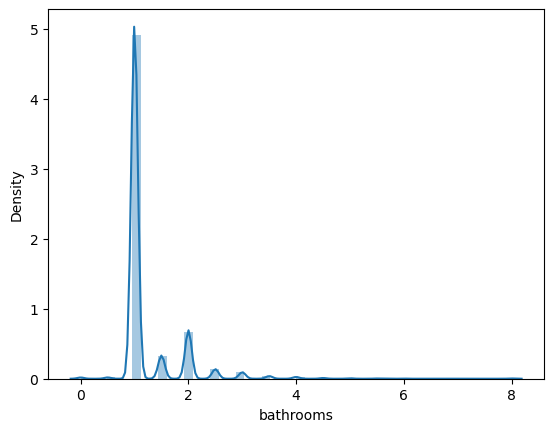

In [17]:
sns.distplot(df["bathrooms"])

In [18]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

Review_Scores_Rating

<Axes: xlabel='review_scores_rating', ylabel='Density'>

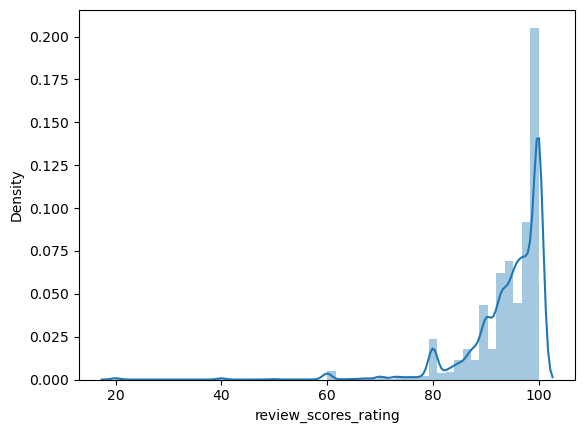

In [19]:
sns.distplot(df["review_scores_rating"])

In [20]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)

Bedrooms

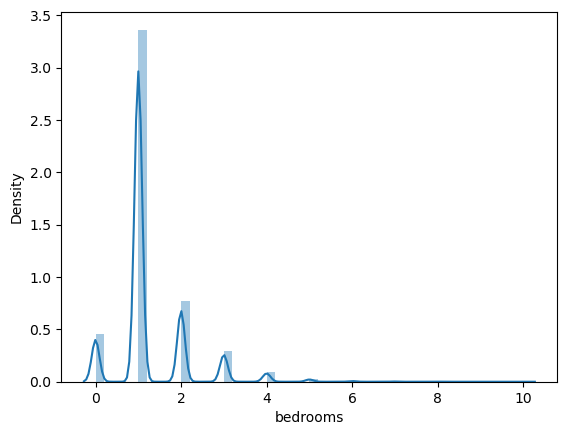

In [21]:
sns.distplot(df["bedrooms"])
plt.show()

In [22]:
df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))

Beds

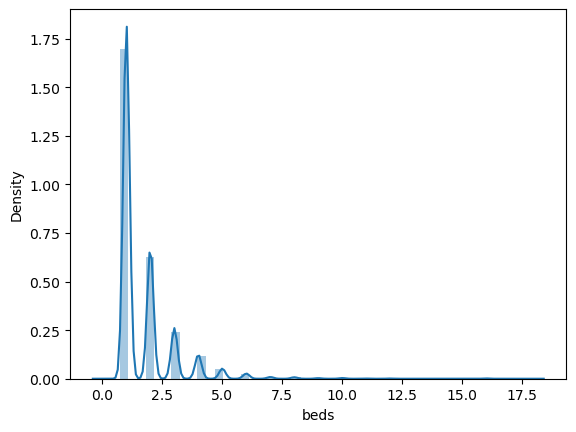

In [23]:
sns.distplot(df["beds"])
plt.show()

In [24]:
df["beds"] = df["beds"].fillna((df["bathrooms"].median()))

Amenties

In [25]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))
    
df["amenities"] = amenities_count

# Data Visualisation

In [26]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)
    
# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

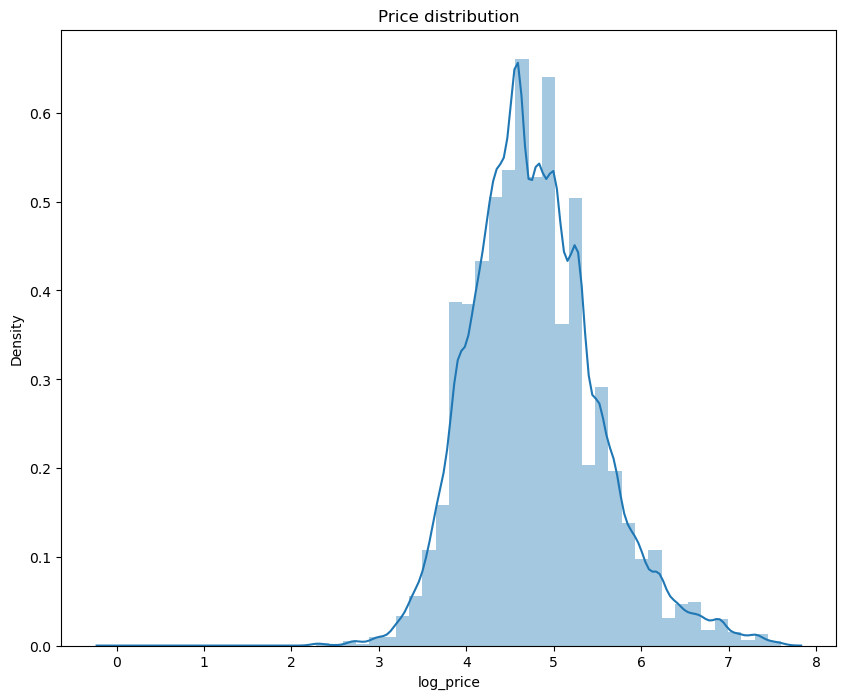

In [27]:
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()

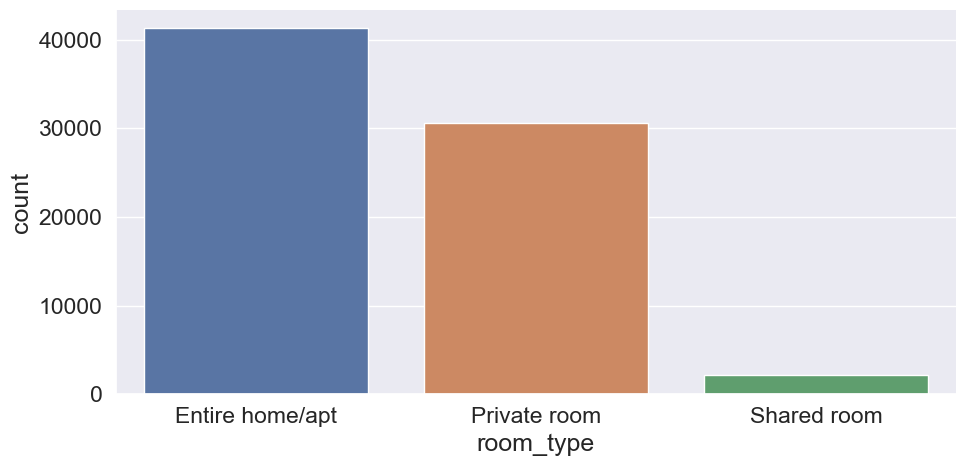

In [28]:
plot_catplot("room_type", "count", 5, 2)

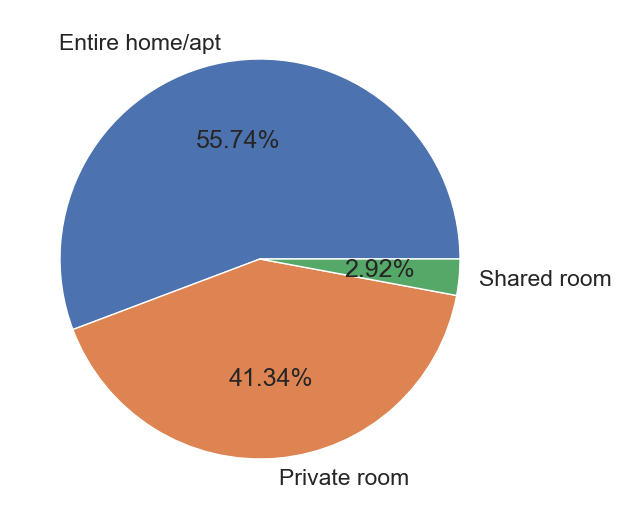

In [29]:
plot_piechart("room_type") 

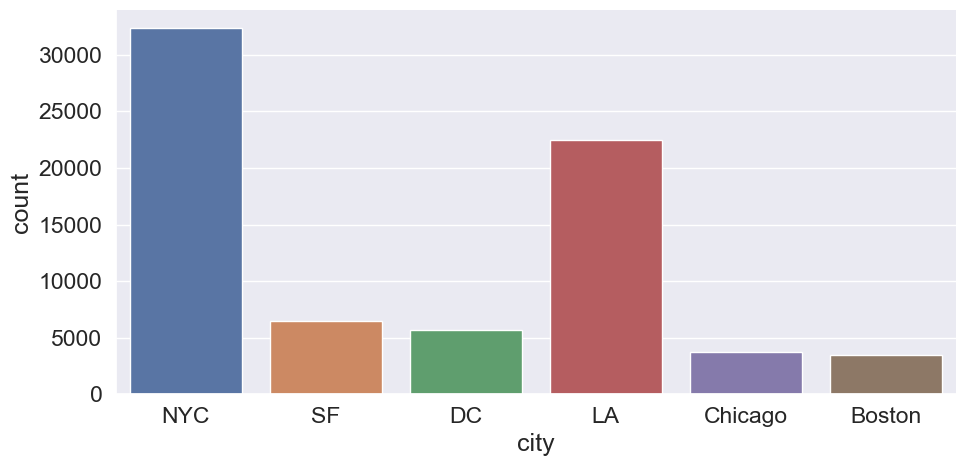

In [30]:
plot_catplot("city","count", 5, 2)

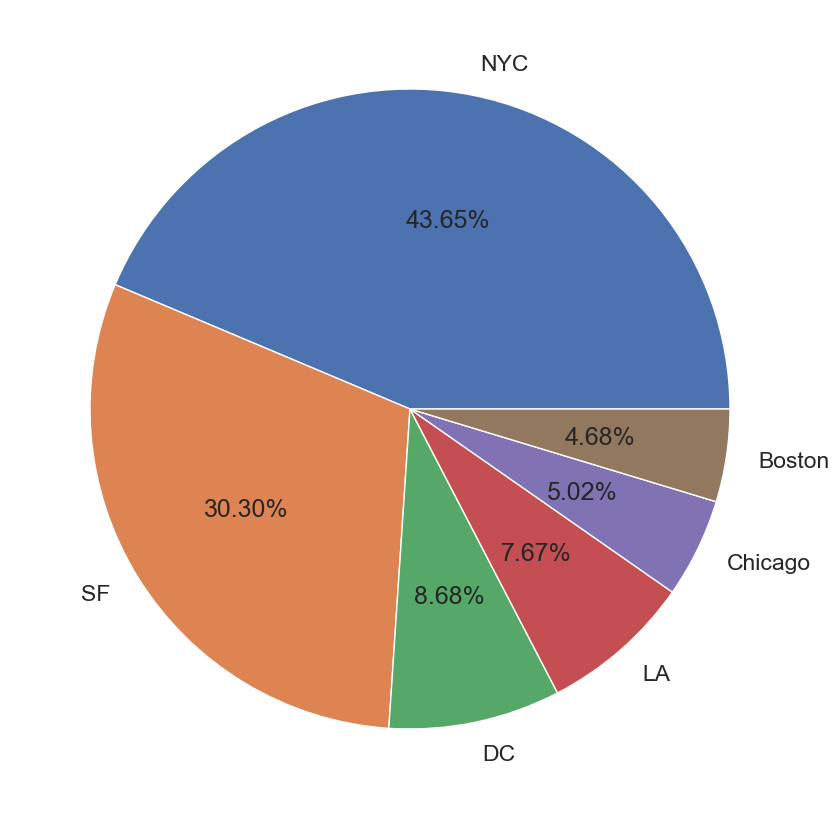

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

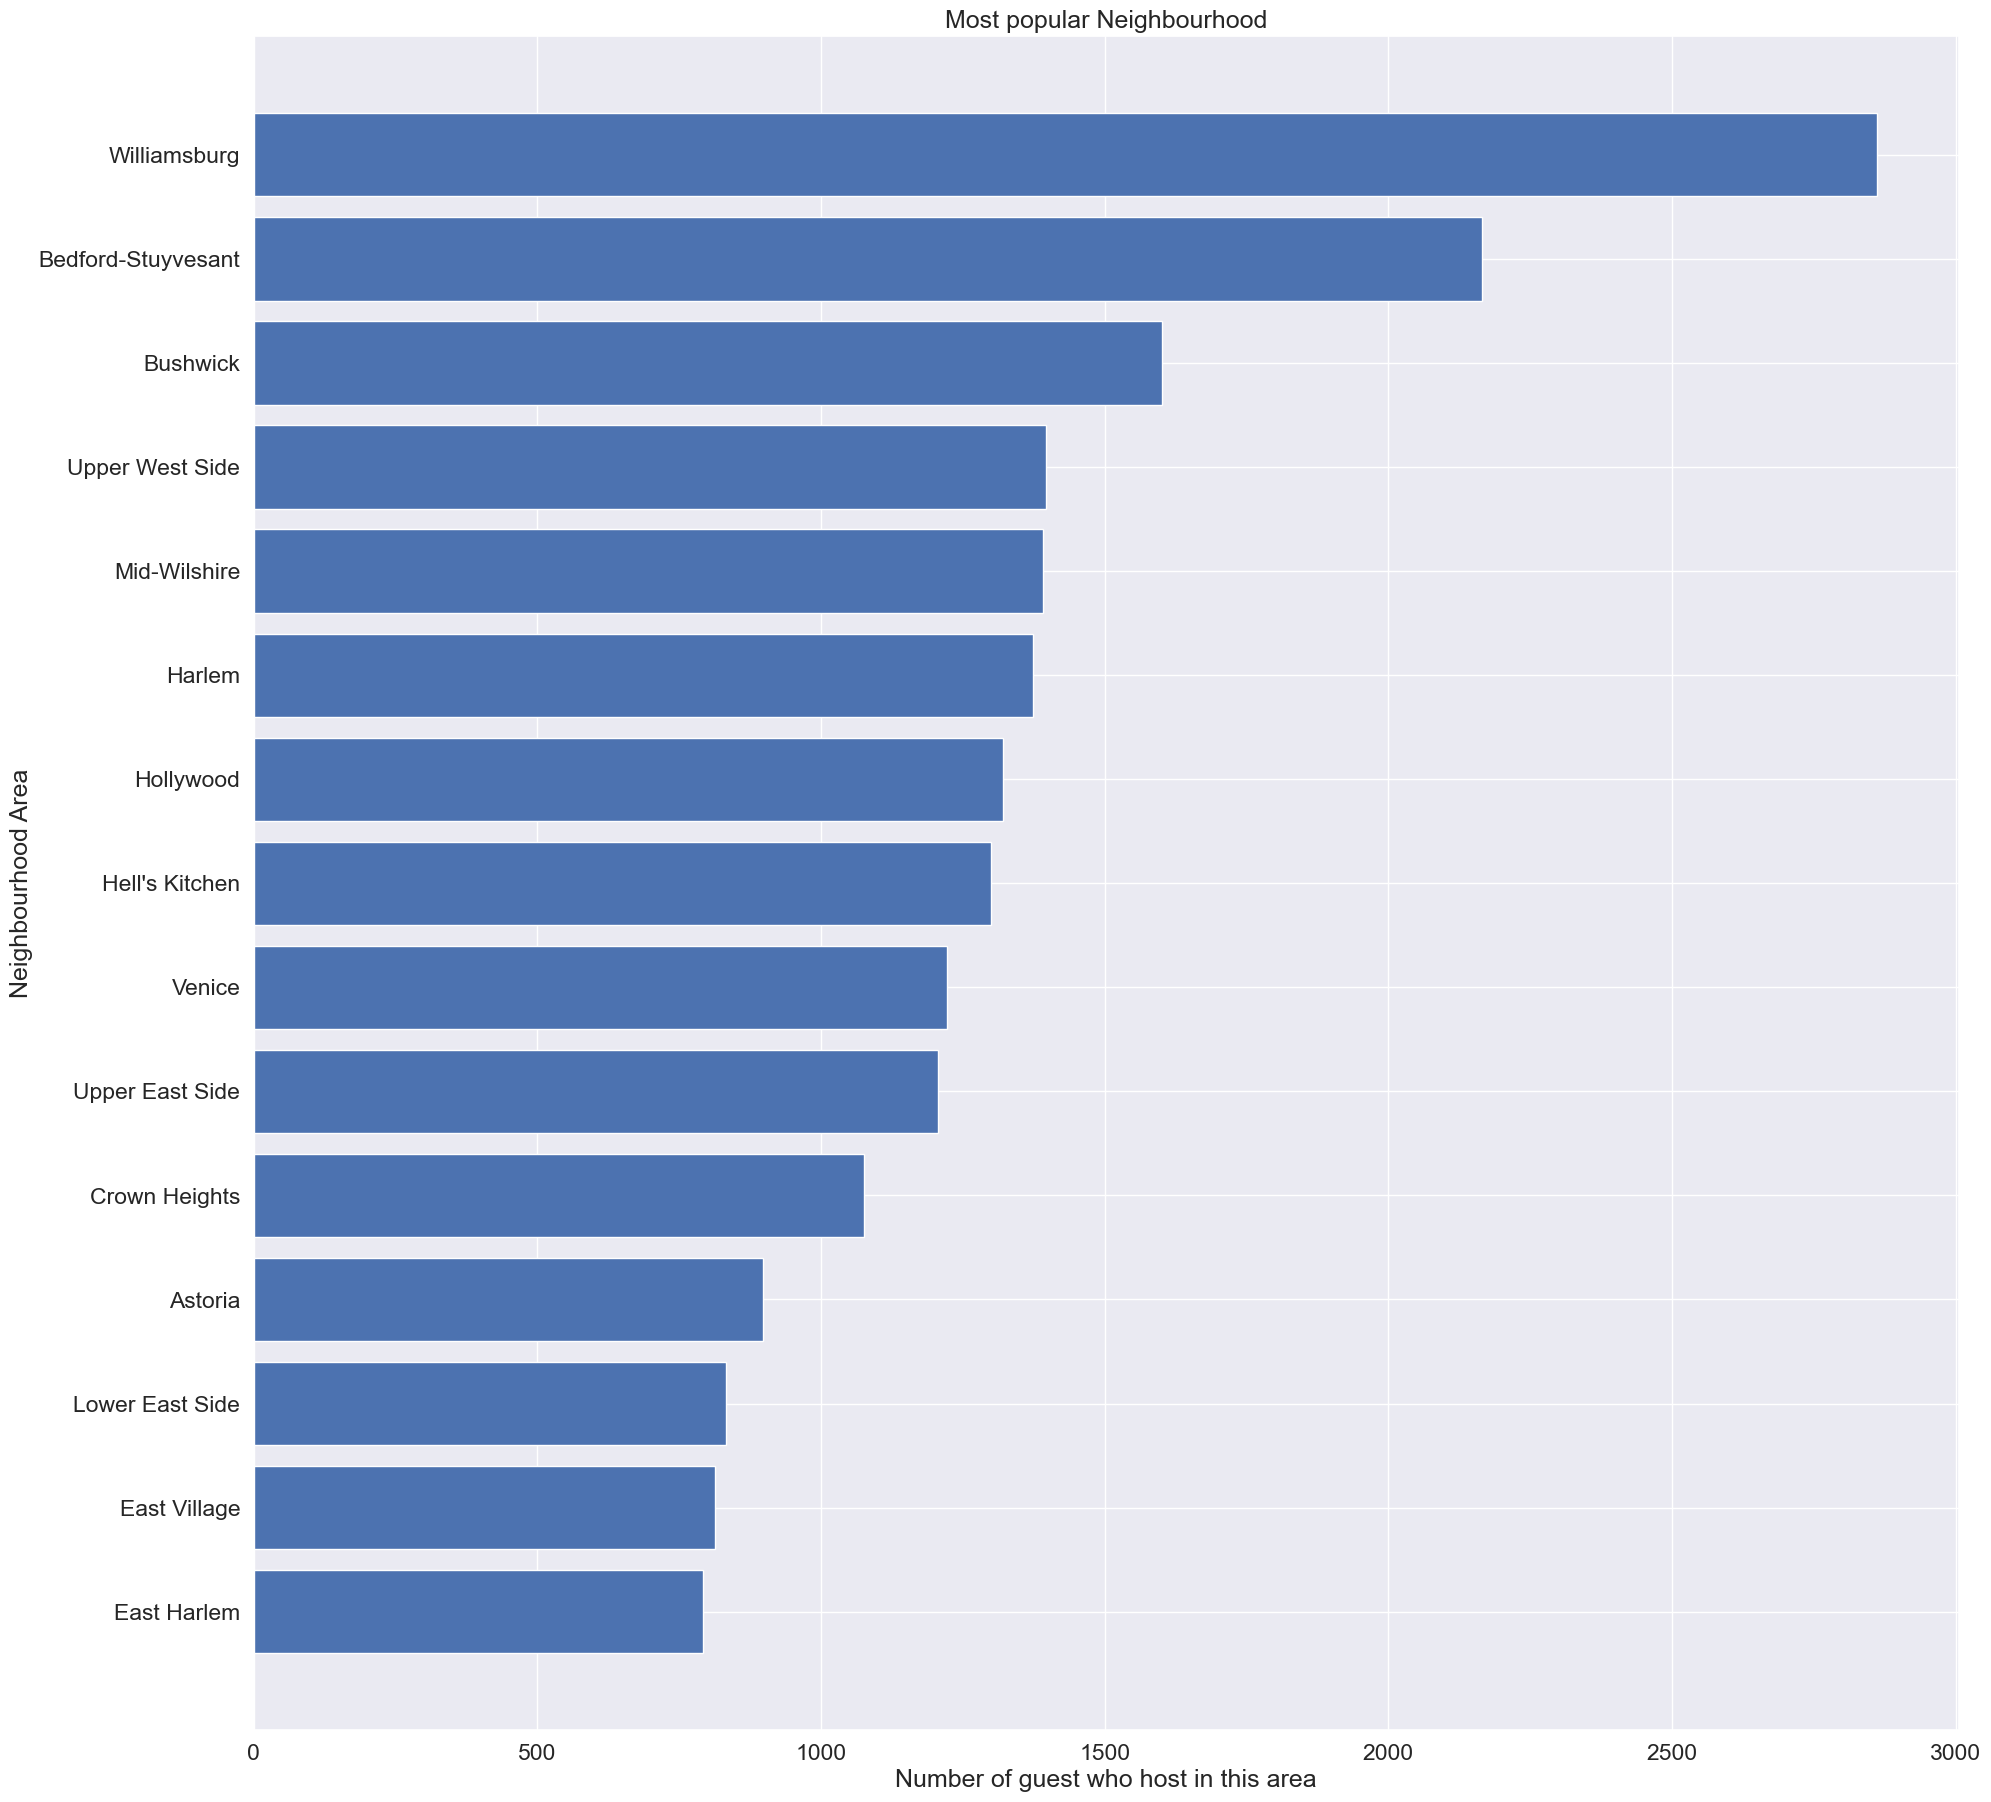

In [32]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

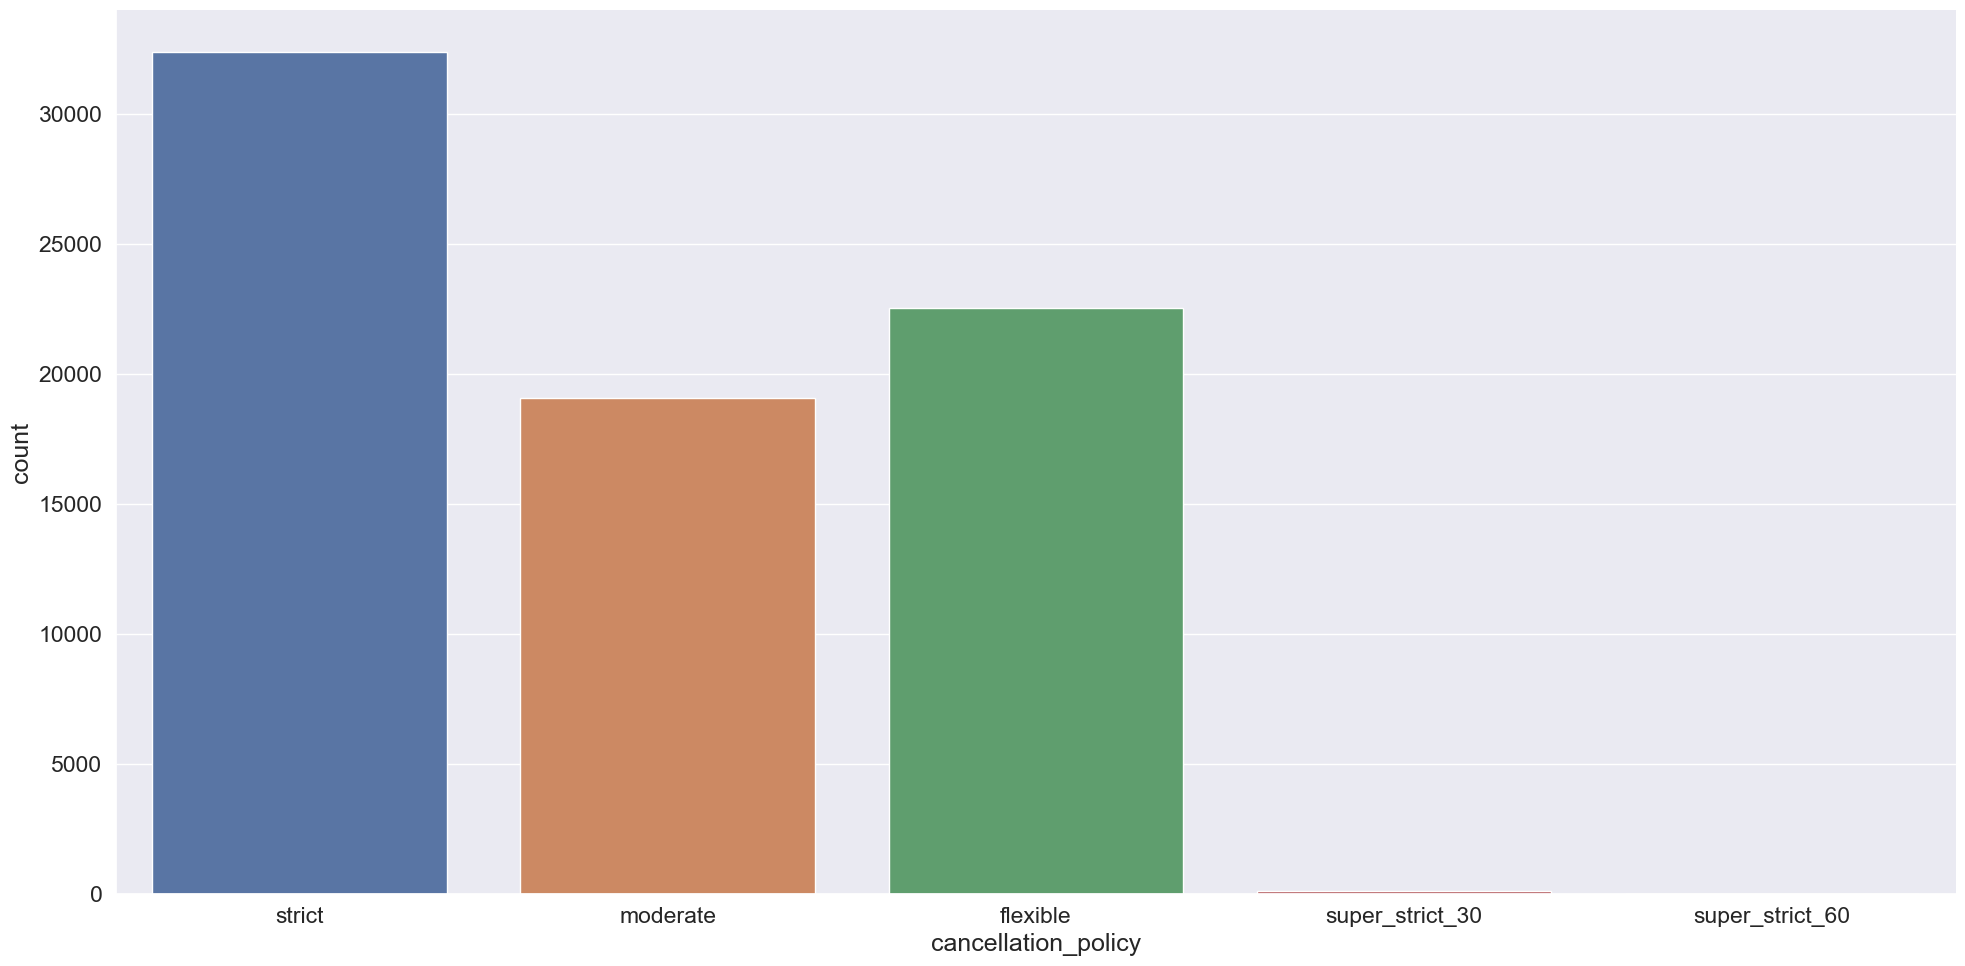

In [33]:
plot_catplot("cancellation_policy","count",10, 2)

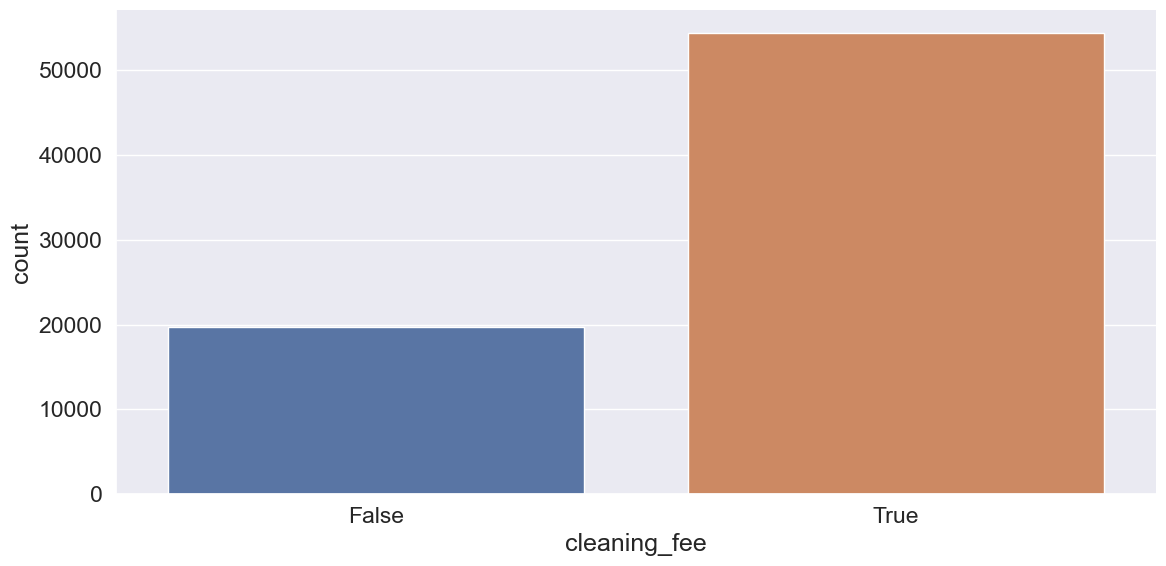

In [34]:
plot_catplot("cleaning_fee","count",6,2)

In [35]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

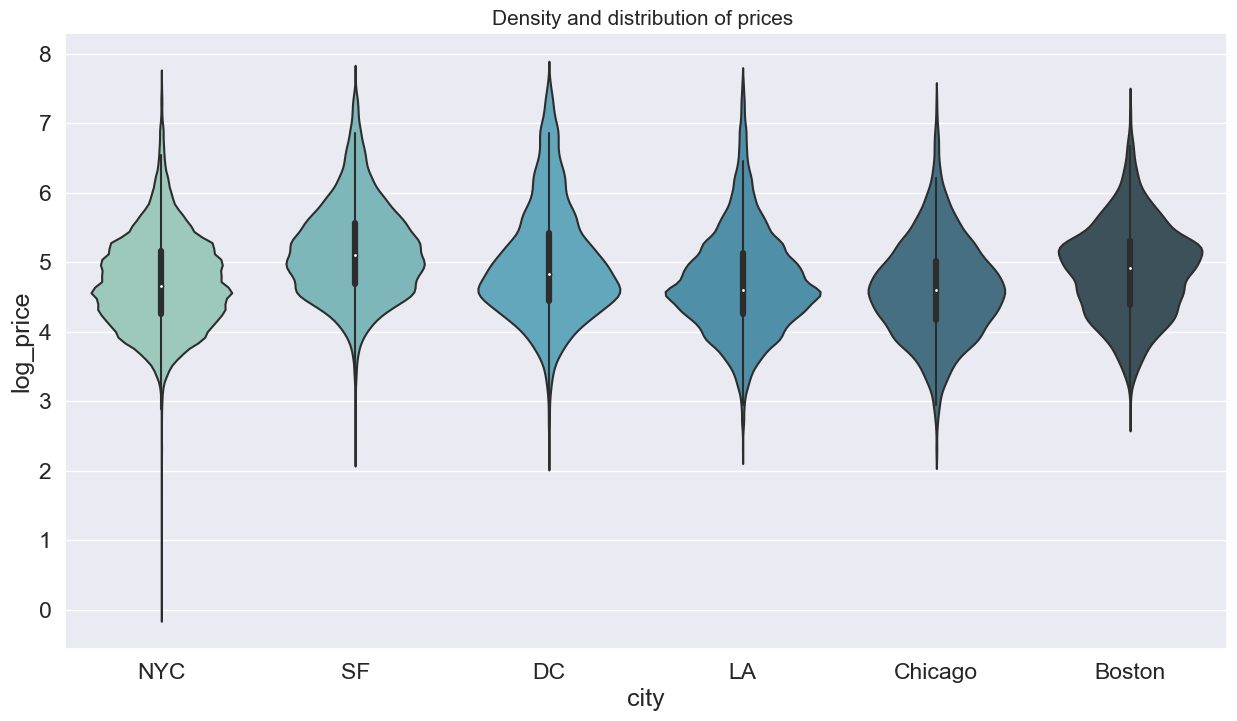

In [36]:
plot_violinplot("city","log_price")

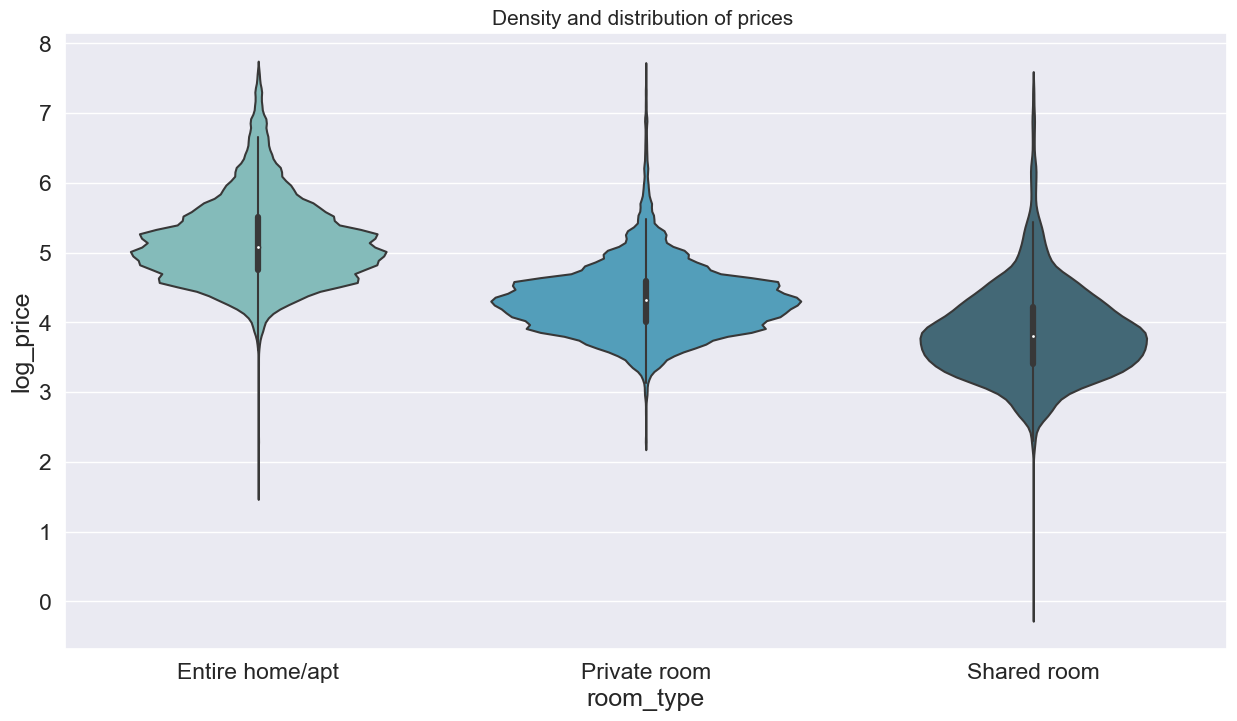

In [37]:
plot_violinplot("room_type","log_price")

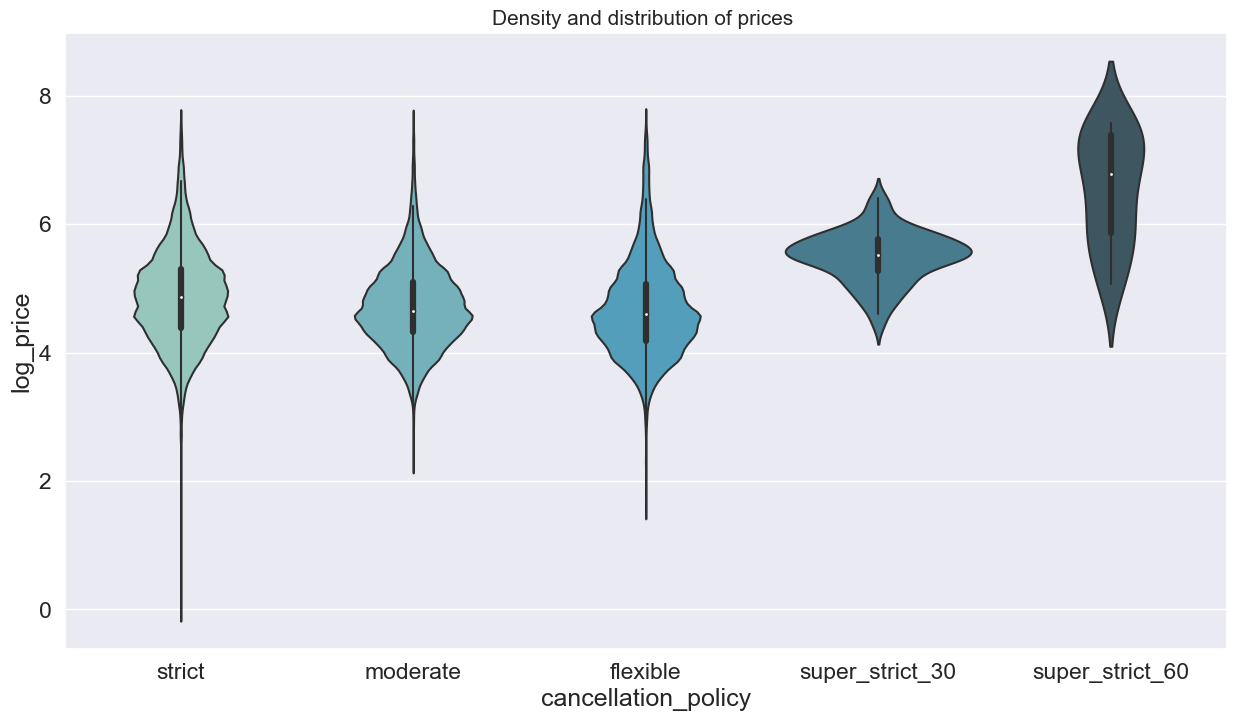

In [38]:
plot_violinplot("cancellation_policy","log_price")

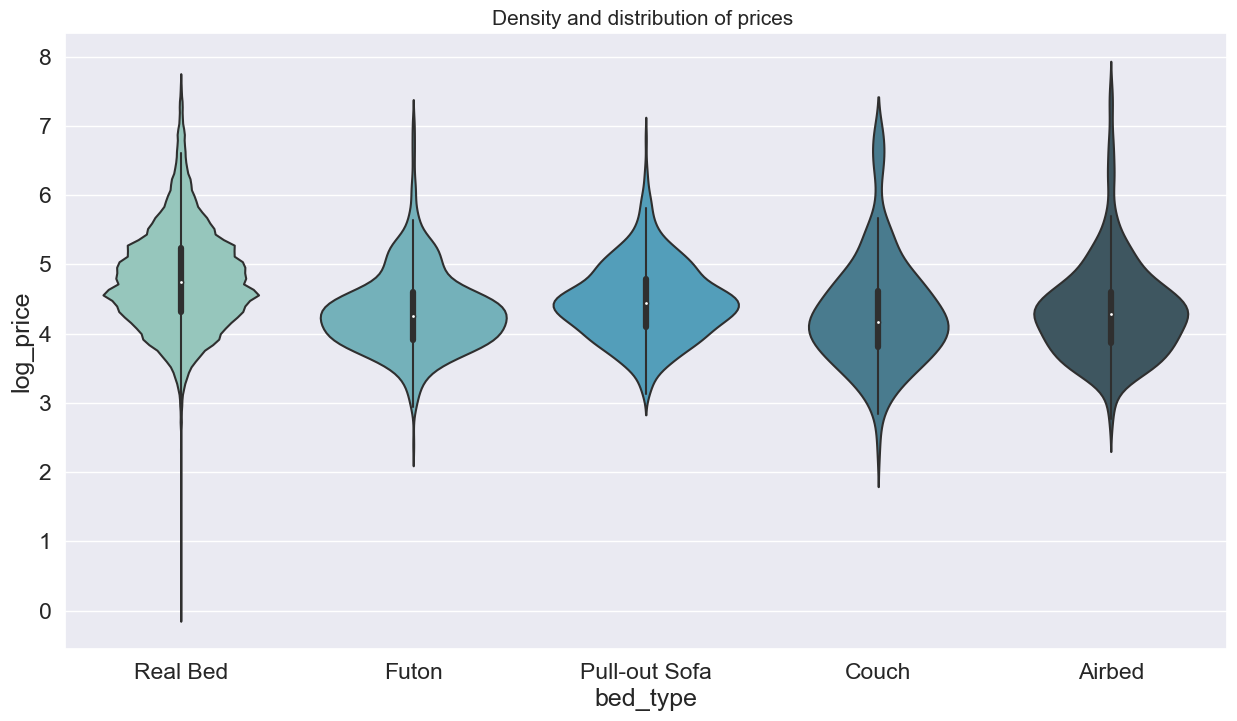

In [39]:
plot_violinplot("bed_type","log_price")

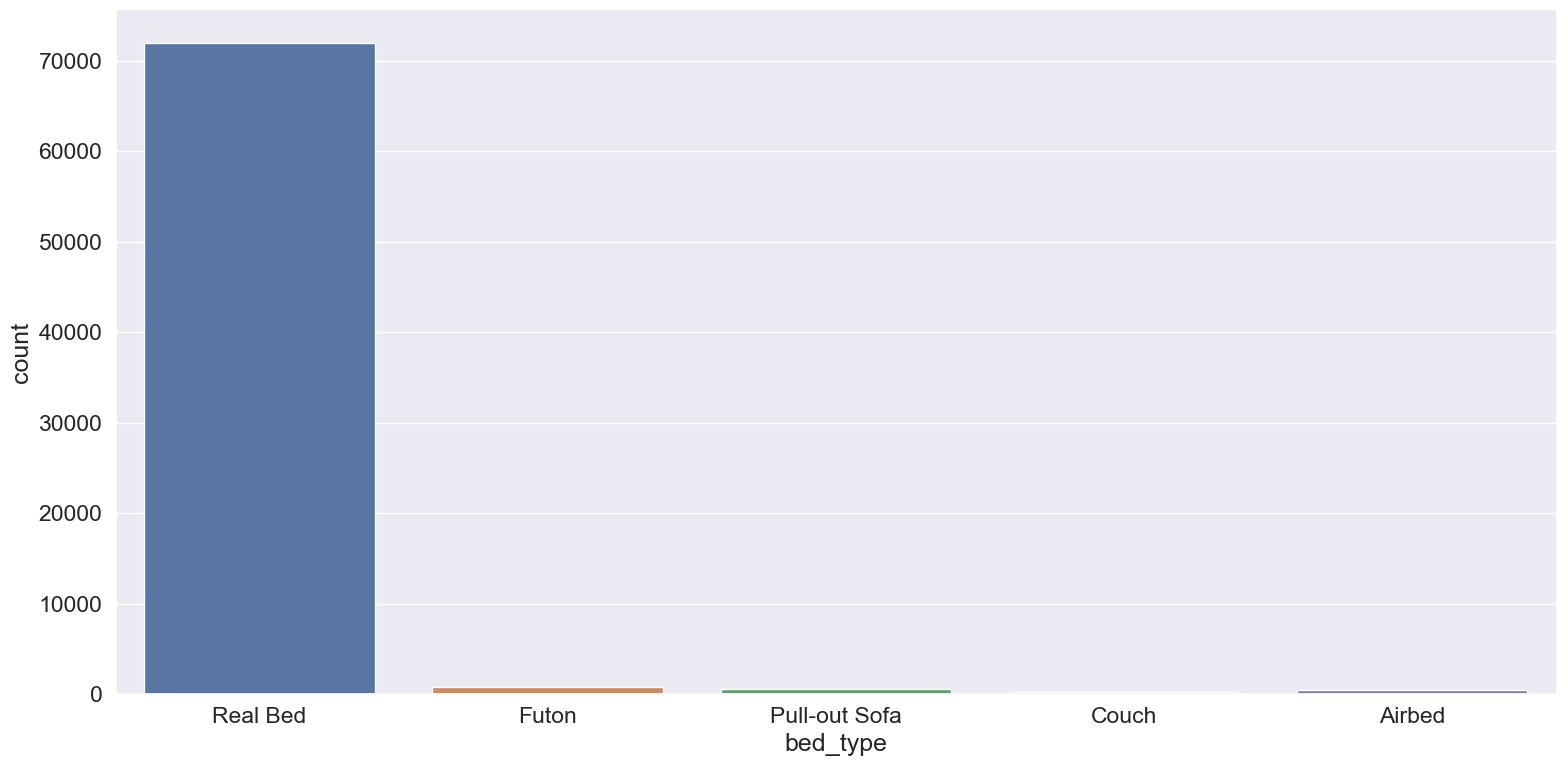

In [40]:
plot_catplot("bed_type","count",8, 2)

In [70]:
categorical_col = []
numerical_col = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)
    else:
        numerical_col.append(column)

In [71]:
categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [46]:
pd.set_option("display.max_columns",None)
df

id  log_price  property_type  room_type  amenities  accommodates  \
0       6901257   5.010635              0          0        152             3   
1       6304928   5.129899              0          0        218             7   
2       7919400   4.976734              0          0        311             5   
3      13418779   6.620073             17          0        210             4   
4       3808709   4.744932              0          0        174             2   
...         ...        ...            ...        ...        ...           ...   
74106  14549287   4.605170              0          1          2             1   
74107  13281809   5.043425              0          0        224             4   
74108  18688039   5.220356              0          0        402             5   
74109  17045948   5.273000              0          0        189             2   
74110   3534845   4.852030              2          0        279             4   

       bathrooms  bed_type  cancellation_policy  cleaning_fee  city  \
0            1.0         4                    2             1     4   
1            1.0         4                    2             1     4   
2            1.0         4                    1             1     4   
3            1.0         4                    0             1     5   
4            1.0         4                    1             1     2   
...          ...       ...                  ...           ...   ...   
74106        1.0         4                    0             0     4   
74107        2.0         4                    1             1     3   
74108        1.0         4                    1             1     4   
74109        1.0         4                    2             1     4   
74110        1.0         4                    1             0     3   

       description  first_review  host_has_profile_pic  \
0             9972          2079                     1   
1            19019          2492                     1   
2            55642          2395                     1   
3            63089          2395                     1   
4            15914          1676                     1   
...            ...           ...                   ...   
74106        72523          1994                     1   
74107        30741          2137                     1   
74108         4691          1547                     1   
74109        21026          1547                     1   
74110        71303          1064                     1   

       host_identity_verified  host_response_rate  host_since  \
0                           1                  80        1069   
1                           0                   2        2980   
2                           1                   2        2743   
3                           1                  80        2188   
4                           1                   2        2139   
...                       ...                 ...         ...   
74106                       1                  80        1432   
74107                       0                   2        2568   
74108                       1                   2         988   
74109                       0                   2        3070   
74110                       1                   2        1314   

       instant_bookable  last_review   latitude   longitude   name  \
0                     0          926  40.696524  -73.991617  10464   
1                     1         1358  40.766115  -73.989040  65672   
2                     1         1349  40.808110  -73.943756  66396   
3                     0         1349  37.772004 -122.431619   9387   
4                     1         1114  38.925627  -77.034596  32068   
...                 ...          ...        ...         ...    ...   
74106                 0         1142  40.709025  -73.939405  72348   
74107                 0         1197  33.871549 -118.396053  59902   
74108                 1         1345  40.706749  -73.942377  43692   
74109    

# HeatMap

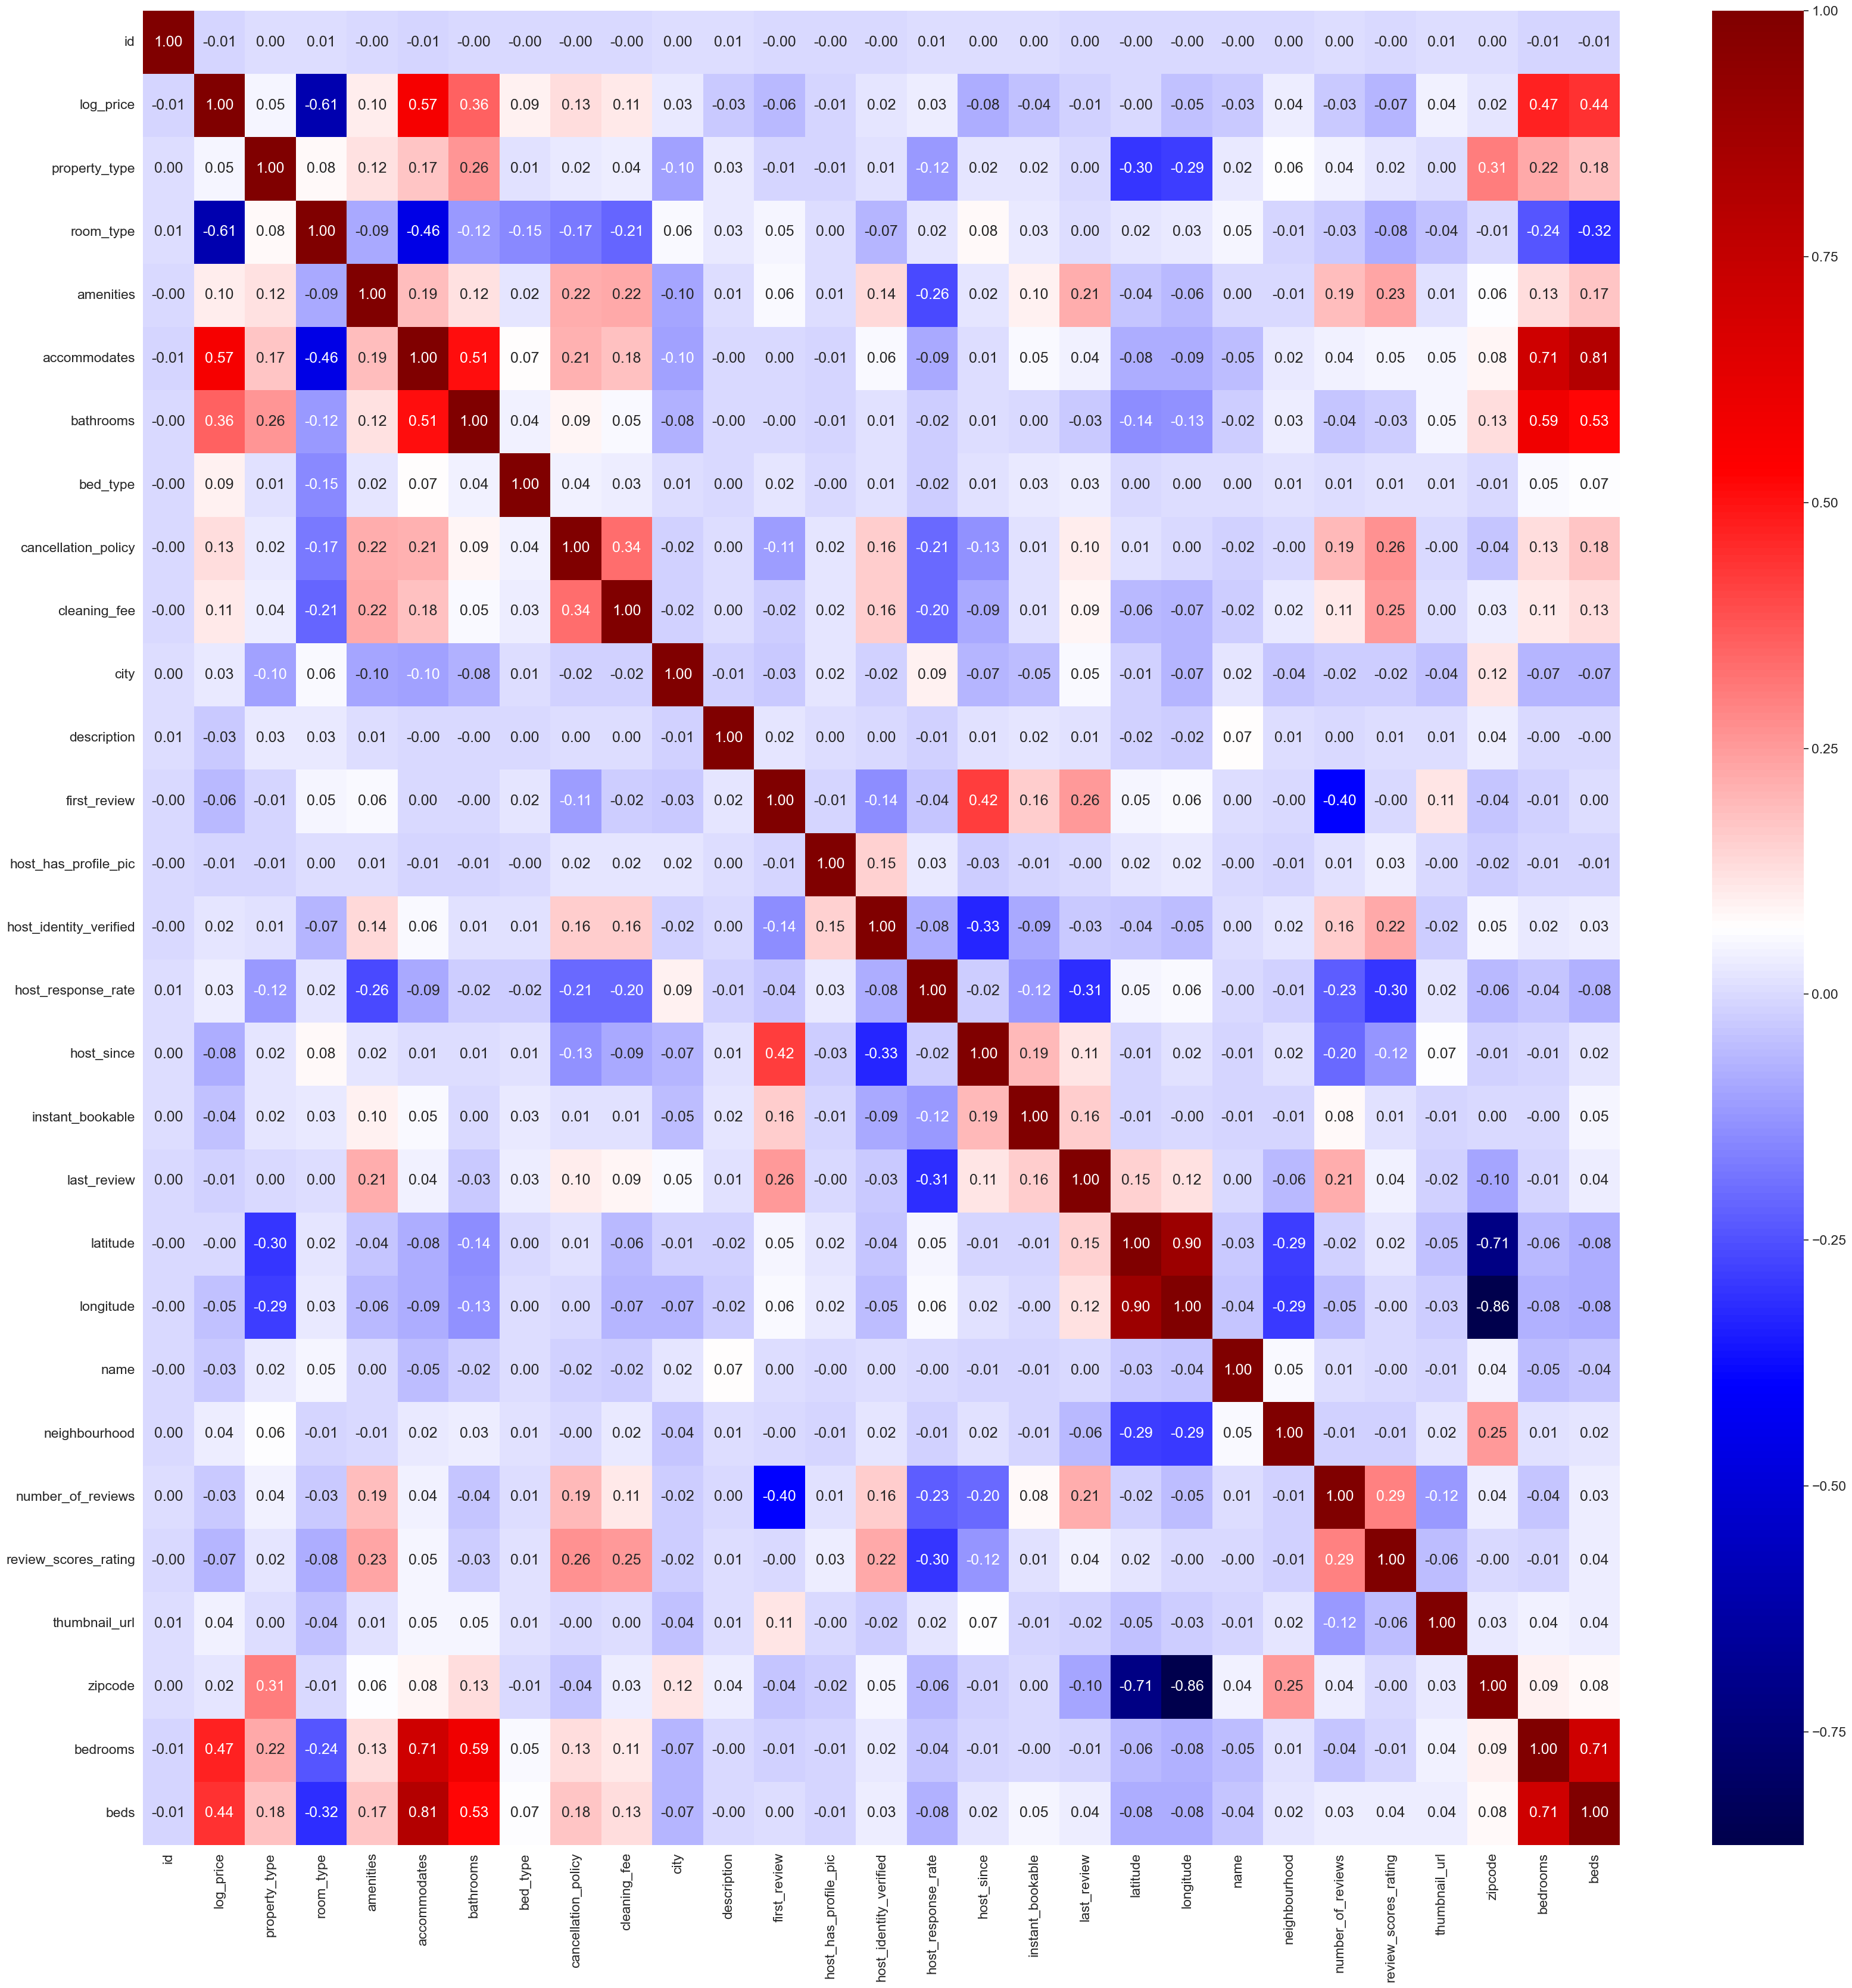

In [47]:
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [48]:
x = df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url", "zipcode"],axis = 1)
y = df.log_price

In [49]:
x

property_type  room_type  amenities  accommodates  bathrooms  bed_type  \
0                  0          0        152             3        1.0         4   
1                  0          0        218             7        1.0         4   
2                  0          0        311             5        1.0         4   
3                 17          0        210             4        1.0         4   
4                  0          0        174             2        1.0         4   
...              ...        ...        ...           ...        ...       ...   
74106              0          1          2             1        1.0         4   
74107              0          0        224             4        2.0         4   
74108              0          0        402             5        1.0         4   
74109              0          0        189             2        1.0         4   
74110              2          0        279             4        1.0         4   

       cancellation_policy  cleaning_fee  city  host_has_profile_pic  \
0                        2             1     4                     1   
1                        2             1     4                     1   
2                        1             1     4                     1   
3                        0             1     5                     1   
4                        1             1     2                     1   
...                    ...           ...   ...                   ...   
74106                    0             0     4                     1   
74107                    1             1     3                     1   
74108                    1             1     4                     1   
74109                    2             1     4                     1   
74110                    1             0     3                     1   

       host_identity_verified  host_response_rate  instant_bookable  \
0                           1                  80                 0   
1                           0                   2                 1   
2                           1                   2                 1   
3                           1                  80                 0   
4                           1                   2                 1   
...                       ...                 ...               ...   
74106                       1                  80                 0   
74107                       0                   2                 0   
74108                       1                   2                 1   
74109                       0                   2                 1   
74110                       1                   2                 0   

        latitude   longitude  number_of_reviews  review_scores_rating  \
0      40.696524  -73.991617                  2                 100.0   
1      40.766115  -73.989040                  6                  93.0   
2      40.808110  -73.943756                 10                  92.0   
3      37.772004 -122.431619                  0                   0.0   
4      38.925627  -77.034596                  4                  40.0   
...          ...         ...                ...                   ...   
74106  40.709025  -73.939405                  0                   0.0   
74107  33.871549 -118.396053                 16                  93.0   
74108  40.706749  -73.942377                 43                  94.0   
74109  40.738535  -74.000157                  0                   0.0   
74110  33.761096 -118.192409                205                  96.0   

       bedrooms  beds  
0           1.0   1.0  
1           3.0   3.0  
2           1.0   3.0  
3           2.0   2.0  
4           0.0   1.0  
...         ...   ...  
74106       1.0   1.0  
74107       2.0   4.0  
74108       2.0   2.0  
74109       0.0   2.0  
74110       1.0   2.0  

[74111 rows x 19 columns]

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

## Model Building

# Linear Regression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

In [56]:
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.36870444242179323

Mean Squarred Error of Linear Regression     :  0.23465903965420476

Root Mean Squarred Error of Linear Regression:  0.4844161843437983

R2 Score of Linear Regression                :  0.546881442650813


# Random Forest

In [57]:
rf = RandomForestRegressor()

In [58]:
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

In [59]:
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.2842053453474767

Mean Squarred Error of Random Forest Regressor     :  0.15584995009648733

Root Mean Squarred Error of Random Forest Regressor:  0.3947783556585737

R2 Score of Random Forest Regressor                :  0.6990590916304478


# Polynomial Regression

In [60]:
from sklearn.linear_model import Ridge
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

In [61]:
#Traning and Testing

poly_tuned.fit(x_train, y_train)

y_pred_poly = poly_tuned.predict(x_test)

KeyboardInterrupt: 

In [ ]:
mae_poly  = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly  = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
r2_poly   = metrics.r2_score(y_test, y_pred_poly)


print('\nMean Absolute Error of Polynomial Regression     : ', mae_poly)
print('\nMean Squarred Error of Polynomial Regression     : ', mse_poly)
print('\nRoot Mean Squarred Error of Polynomial Regression: ', rmse_poly)
print('\nR2 Score of Polynomial Regression                : ', r2_poly)

# CatBoost 

In [62]:
model_CBR = CatBoostRegressor()

In [63]:
model_CBR.fit(x_train, y_train)

cross_val_score(model_CBR, x_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

Learning rate set to 0.078038
0:	learn: 0.6884814	total: 70ms	remaining: 1m 9s
1:	learn: 0.6629188	total: 77.9ms	remaining: 38.9s
2:	learn: 0.6397968	total: 85.2ms	remaining: 28.3s
3:	learn: 0.6197053	total: 92.5ms	remaining: 23s
4:	learn: 0.6022100	total: 99.4ms	remaining: 19.8s
5:	learn: 0.5867609	total: 106ms	remaining: 17.6s
6:	learn: 0.5716923	total: 113ms	remaining: 16s
7:	learn: 0.5592553	total: 118ms	remaining: 14.7s
8:	learn: 0.5475392	total: 125ms	remaining: 13.7s
9:	learn: 0.5373710	total: 131ms	remaining: 12.9s
10:	learn: 0.5274211	total: 137ms	remaining: 12.3s
11:	learn: 0.5182308	total: 144ms	remaining: 11.8s
12:	learn: 0.5107779	total: 149ms	remaining: 11.3s
13:	learn: 0.5038525	total: 156ms	remaining: 11s
14:	learn: 0.4975683	total: 162ms	remaining: 10.6s
15:	learn: 0.4914023	total: 169ms	remaining: 10.4s
16:	learn: 0.4865003	total: 175ms	remaining: 10.1s
17:	learn: 0.4820088	total: 182ms	remaining: 9.95s
18:	learn: 0.4773001	total: 189ms	remaining: 9.77s
19:	learn: 0.4

166:	learn: 0.3946554	total: 1.39s	remaining: 6.94s
167:	learn: 0.3944775	total: 1.4s	remaining: 6.94s
168:	learn: 0.3943022	total: 1.41s	remaining: 6.94s
169:	learn: 0.3941640	total: 1.44s	remaining: 7.01s
170:	learn: 0.3940629	total: 1.44s	remaining: 6.99s
171:	learn: 0.3939888	total: 1.45s	remaining: 6.97s
172:	learn: 0.3938816	total: 1.45s	remaining: 6.95s
173:	learn: 0.3937430	total: 1.46s	remaining: 6.94s
174:	learn: 0.3936234	total: 1.47s	remaining: 6.93s
175:	learn: 0.3935217	total: 1.48s	remaining: 6.92s
176:	learn: 0.3933511	total: 1.49s	remaining: 6.91s
177:	learn: 0.3932324	total: 1.49s	remaining: 6.89s
178:	learn: 0.3930785	total: 1.5s	remaining: 6.89s
179:	learn: 0.3929735	total: 1.51s	remaining: 6.88s
180:	learn: 0.3928236	total: 1.52s	remaining: 6.86s
181:	learn: 0.3926717	total: 1.52s	remaining: 6.86s
182:	learn: 0.3925097	total: 1.53s	remaining: 6.85s
183:	learn: 0.3923898	total: 1.54s	remaining: 6.85s
184:	learn: 0.3922582	total: 1.55s	remaining: 6.85s
185:	learn: 0.

325:	learn: 0.3801833	total: 3.04s	remaining: 6.28s
326:	learn: 0.3801043	total: 3.05s	remaining: 6.27s
327:	learn: 0.3800452	total: 3.06s	remaining: 6.26s
328:	learn: 0.3800003	total: 3.06s	remaining: 6.25s
329:	learn: 0.3799375	total: 3.07s	remaining: 6.24s
330:	learn: 0.3798709	total: 3.08s	remaining: 6.23s
331:	learn: 0.3798187	total: 3.09s	remaining: 6.22s
332:	learn: 0.3797438	total: 3.1s	remaining: 6.21s
333:	learn: 0.3796703	total: 3.11s	remaining: 6.2s
334:	learn: 0.3795589	total: 3.12s	remaining: 6.19s
335:	learn: 0.3795037	total: 3.13s	remaining: 6.18s
336:	learn: 0.3794676	total: 3.14s	remaining: 6.18s
337:	learn: 0.3793974	total: 3.15s	remaining: 6.17s
338:	learn: 0.3793554	total: 3.16s	remaining: 6.16s
339:	learn: 0.3792882	total: 3.17s	remaining: 6.16s
340:	learn: 0.3792184	total: 3.18s	remaining: 6.15s
341:	learn: 0.3791073	total: 3.19s	remaining: 6.15s
342:	learn: 0.3790563	total: 3.21s	remaining: 6.14s
343:	learn: 0.3789770	total: 3.22s	remaining: 6.14s
344:	learn: 0.

498:	learn: 0.3714302	total: 4.66s	remaining: 4.68s
499:	learn: 0.3713735	total: 4.67s	remaining: 4.67s
500:	learn: 0.3713372	total: 4.68s	remaining: 4.67s
501:	learn: 0.3713051	total: 4.69s	remaining: 4.66s
502:	learn: 0.3712645	total: 4.7s	remaining: 4.65s
503:	learn: 0.3712191	total: 4.71s	remaining: 4.64s
504:	learn: 0.3711881	total: 4.72s	remaining: 4.63s
505:	learn: 0.3710933	total: 4.73s	remaining: 4.62s
506:	learn: 0.3710412	total: 4.74s	remaining: 4.61s
507:	learn: 0.3710121	total: 4.75s	remaining: 4.6s
508:	learn: 0.3709863	total: 4.76s	remaining: 4.59s
509:	learn: 0.3709292	total: 4.77s	remaining: 4.59s
510:	learn: 0.3708945	total: 4.78s	remaining: 4.58s
511:	learn: 0.3708428	total: 4.79s	remaining: 4.57s
512:	learn: 0.3707931	total: 4.8s	remaining: 4.56s
513:	learn: 0.3707817	total: 4.81s	remaining: 4.55s
514:	learn: 0.3707577	total: 4.82s	remaining: 4.54s
515:	learn: 0.3707320	total: 4.83s	remaining: 4.53s
516:	learn: 0.3706840	total: 4.83s	remaining: 4.52s
517:	learn: 0.3

664:	learn: 0.3654705	total: 6.07s	remaining: 3.06s
665:	learn: 0.3654533	total: 6.08s	remaining: 3.05s
666:	learn: 0.3654261	total: 6.09s	remaining: 3.04s
667:	learn: 0.3654062	total: 6.1s	remaining: 3.03s
668:	learn: 0.3653723	total: 6.11s	remaining: 3.02s
669:	learn: 0.3653522	total: 6.11s	remaining: 3.01s
670:	learn: 0.3653313	total: 6.12s	remaining: 3s
671:	learn: 0.3652851	total: 6.13s	remaining: 2.99s
672:	learn: 0.3652557	total: 6.13s	remaining: 2.98s
673:	learn: 0.3652235	total: 6.14s	remaining: 2.97s
674:	learn: 0.3651990	total: 6.15s	remaining: 2.96s
675:	learn: 0.3651767	total: 6.16s	remaining: 2.95s
676:	learn: 0.3651486	total: 6.16s	remaining: 2.94s
677:	learn: 0.3651068	total: 6.17s	remaining: 2.93s
678:	learn: 0.3650780	total: 6.18s	remaining: 2.92s
679:	learn: 0.3650446	total: 6.18s	remaining: 2.91s
680:	learn: 0.3650287	total: 6.19s	remaining: 2.9s
681:	learn: 0.3649878	total: 6.2s	remaining: 2.89s
682:	learn: 0.3649565	total: 6.21s	remaining: 2.88s
683:	learn: 0.3649

837:	learn: 0.3602715	total: 7.51s	remaining: 1.45s
838:	learn: 0.3602403	total: 7.52s	remaining: 1.44s
839:	learn: 0.3602195	total: 7.55s	remaining: 1.44s
840:	learn: 0.3602021	total: 7.56s	remaining: 1.43s
841:	learn: 0.3601719	total: 7.56s	remaining: 1.42s
842:	learn: 0.3601381	total: 7.57s	remaining: 1.41s
843:	learn: 0.3600999	total: 7.58s	remaining: 1.4s
844:	learn: 0.3600746	total: 7.59s	remaining: 1.39s
845:	learn: 0.3600462	total: 7.59s	remaining: 1.38s
846:	learn: 0.3600126	total: 7.6s	remaining: 1.37s
847:	learn: 0.3599912	total: 7.61s	remaining: 1.36s
848:	learn: 0.3599464	total: 7.62s	remaining: 1.35s
849:	learn: 0.3599246	total: 7.63s	remaining: 1.34s
850:	learn: 0.3599034	total: 7.63s	remaining: 1.34s
851:	learn: 0.3598674	total: 7.64s	remaining: 1.33s
852:	learn: 0.3598319	total: 7.65s	remaining: 1.32s
853:	learn: 0.3598152	total: 7.66s	remaining: 1.31s
854:	learn: 0.3597859	total: 7.67s	remaining: 1.3s
855:	learn: 0.3597773	total: 7.67s	remaining: 1.29s
856:	learn: 0.3

3:	learn: 0.6240543	total: 29.9ms	remaining: 7.44s
4:	learn: 0.6068497	total: 39.8ms	remaining: 7.92s
5:	learn: 0.5916261	total: 49.6ms	remaining: 8.22s
6:	learn: 0.5767661	total: 58ms	remaining: 8.22s
7:	learn: 0.5644822	total: 65.5ms	remaining: 8.12s
8:	learn: 0.5527651	total: 73.2ms	remaining: 8.06s
9:	learn: 0.5427994	total: 80.1ms	remaining: 7.93s
10:	learn: 0.5332057	total: 86.7ms	remaining: 7.8s
11:	learn: 0.5239594	total: 93.8ms	remaining: 7.72s
12:	learn: 0.5164944	total: 101ms	remaining: 7.67s
13:	learn: 0.5096229	total: 108ms	remaining: 7.59s
14:	learn: 0.5029145	total: 115ms	remaining: 7.56s
15:	learn: 0.4977718	total: 122ms	remaining: 7.52s
16:	learn: 0.4920552	total: 129ms	remaining: 7.46s
17:	learn: 0.4878647	total: 135ms	remaining: 7.38s
18:	learn: 0.4830237	total: 142ms	remaining: 7.33s
19:	learn: 0.4795520	total: 149ms	remaining: 7.29s
20:	learn: 0.4752232	total: 157ms	remaining: 7.33s
21:	learn: 0.4716216	total: 164ms	remaining: 7.29s
22:	learn: 0.4690338	total: 170m

174:	learn: 0.3959519	total: 1.23s	remaining: 5.78s
175:	learn: 0.3958121	total: 1.23s	remaining: 5.78s
176:	learn: 0.3957166	total: 1.24s	remaining: 5.78s
177:	learn: 0.3956131	total: 1.25s	remaining: 5.78s
178:	learn: 0.3954246	total: 1.26s	remaining: 5.77s
179:	learn: 0.3953266	total: 1.26s	remaining: 5.76s
180:	learn: 0.3951818	total: 1.27s	remaining: 5.75s
181:	learn: 0.3949927	total: 1.28s	remaining: 5.74s
182:	learn: 0.3948389	total: 1.28s	remaining: 5.73s
183:	learn: 0.3947040	total: 1.29s	remaining: 5.73s
184:	learn: 0.3945436	total: 1.3s	remaining: 5.72s
185:	learn: 0.3943367	total: 1.3s	remaining: 5.71s
186:	learn: 0.3941778	total: 1.31s	remaining: 5.7s
187:	learn: 0.3940647	total: 1.32s	remaining: 5.7s
188:	learn: 0.3938676	total: 1.32s	remaining: 5.69s
189:	learn: 0.3937311	total: 1.33s	remaining: 5.68s
190:	learn: 0.3936460	total: 1.34s	remaining: 5.67s
191:	learn: 0.3935125	total: 1.34s	remaining: 5.66s
192:	learn: 0.3933909	total: 1.35s	remaining: 5.65s
193:	learn: 0.39

350:	learn: 0.3798143	total: 2.43s	remaining: 4.49s
351:	learn: 0.3797435	total: 2.44s	remaining: 4.49s
352:	learn: 0.3796938	total: 2.44s	remaining: 4.48s
353:	learn: 0.3796271	total: 2.45s	remaining: 4.48s
354:	learn: 0.3795710	total: 2.46s	remaining: 4.47s
355:	learn: 0.3795363	total: 2.46s	remaining: 4.46s
356:	learn: 0.3794829	total: 2.47s	remaining: 4.45s
357:	learn: 0.3794493	total: 2.48s	remaining: 4.44s
358:	learn: 0.3794174	total: 2.49s	remaining: 4.44s
359:	learn: 0.3793778	total: 2.49s	remaining: 4.43s
360:	learn: 0.3793125	total: 2.5s	remaining: 4.42s
361:	learn: 0.3792686	total: 2.5s	remaining: 4.42s
362:	learn: 0.3792238	total: 2.51s	remaining: 4.41s
363:	learn: 0.3791726	total: 2.52s	remaining: 4.4s
364:	learn: 0.3791037	total: 2.52s	remaining: 4.39s
365:	learn: 0.3790331	total: 2.53s	remaining: 4.38s
366:	learn: 0.3789803	total: 2.54s	remaining: 4.37s
367:	learn: 0.3789102	total: 2.54s	remaining: 4.37s
368:	learn: 0.3788139	total: 2.55s	remaining: 4.36s
369:	learn: 0.3

524:	learn: 0.3713254	total: 3.62s	remaining: 3.28s
525:	learn: 0.3712866	total: 3.63s	remaining: 3.27s
526:	learn: 0.3712327	total: 3.64s	remaining: 3.27s
527:	learn: 0.3712053	total: 3.65s	remaining: 3.26s
528:	learn: 0.3711672	total: 3.65s	remaining: 3.25s
529:	learn: 0.3711386	total: 3.66s	remaining: 3.24s
530:	learn: 0.3711070	total: 3.67s	remaining: 3.24s
531:	learn: 0.3710476	total: 3.67s	remaining: 3.23s
532:	learn: 0.3709991	total: 3.68s	remaining: 3.22s
533:	learn: 0.3709244	total: 3.68s	remaining: 3.21s
534:	learn: 0.3708842	total: 3.69s	remaining: 3.21s
535:	learn: 0.3708226	total: 3.7s	remaining: 3.2s
536:	learn: 0.3707861	total: 3.71s	remaining: 3.19s
537:	learn: 0.3707359	total: 3.71s	remaining: 3.19s
538:	learn: 0.3707041	total: 3.72s	remaining: 3.18s
539:	learn: 0.3706916	total: 3.72s	remaining: 3.17s
540:	learn: 0.3706533	total: 3.73s	remaining: 3.17s
541:	learn: 0.3706287	total: 3.74s	remaining: 3.16s
542:	learn: 0.3705667	total: 3.74s	remaining: 3.15s
543:	learn: 0.

696:	learn: 0.3646378	total: 4.82s	remaining: 2.09s
697:	learn: 0.3645911	total: 4.83s	remaining: 2.09s
698:	learn: 0.3645399	total: 4.83s	remaining: 2.08s
699:	learn: 0.3645189	total: 4.84s	remaining: 2.08s
700:	learn: 0.3644980	total: 4.85s	remaining: 2.07s
701:	learn: 0.3644725	total: 4.86s	remaining: 2.06s
702:	learn: 0.3644373	total: 4.86s	remaining: 2.05s
703:	learn: 0.3644126	total: 4.87s	remaining: 2.05s
704:	learn: 0.3643775	total: 4.88s	remaining: 2.04s
705:	learn: 0.3643437	total: 4.88s	remaining: 2.03s
706:	learn: 0.3642787	total: 4.89s	remaining: 2.03s
707:	learn: 0.3642550	total: 4.89s	remaining: 2.02s
708:	learn: 0.3642114	total: 4.9s	remaining: 2.01s
709:	learn: 0.3641753	total: 4.91s	remaining: 2s
710:	learn: 0.3641412	total: 4.92s	remaining: 2s
711:	learn: 0.3641070	total: 4.92s	remaining: 1.99s
712:	learn: 0.3640758	total: 4.93s	remaining: 1.99s
713:	learn: 0.3640366	total: 4.94s	remaining: 1.98s
714:	learn: 0.3640055	total: 4.94s	remaining: 1.97s
715:	learn: 0.36398

866:	learn: 0.3590566	total: 6.03s	remaining: 925ms
867:	learn: 0.3590101	total: 6.04s	remaining: 919ms
868:	learn: 0.3589869	total: 6.05s	remaining: 912ms
869:	learn: 0.3589494	total: 6.06s	remaining: 905ms
870:	learn: 0.3589277	total: 6.06s	remaining: 898ms
871:	learn: 0.3588920	total: 6.07s	remaining: 891ms
872:	learn: 0.3588451	total: 6.08s	remaining: 884ms
873:	learn: 0.3588191	total: 6.08s	remaining: 877ms
874:	learn: 0.3587995	total: 6.09s	remaining: 870ms
875:	learn: 0.3587786	total: 6.1s	remaining: 863ms
876:	learn: 0.3587479	total: 6.1s	remaining: 856ms
877:	learn: 0.3587228	total: 6.11s	remaining: 849ms
878:	learn: 0.3587100	total: 6.12s	remaining: 842ms
879:	learn: 0.3586851	total: 6.12s	remaining: 835ms
880:	learn: 0.3586587	total: 6.13s	remaining: 828ms
881:	learn: 0.3586090	total: 6.14s	remaining: 821ms
882:	learn: 0.3585906	total: 6.14s	remaining: 814ms
883:	learn: 0.3585638	total: 6.15s	remaining: 807ms
884:	learn: 0.3585459	total: 6.16s	remaining: 800ms
885:	learn: 0.

27:	learn: 0.4520545	total: 199ms	remaining: 6.91s
28:	learn: 0.4501694	total: 209ms	remaining: 7s
29:	learn: 0.4485162	total: 218ms	remaining: 7.04s
30:	learn: 0.4471520	total: 226ms	remaining: 7.05s
31:	learn: 0.4455667	total: 233ms	remaining: 7.04s
32:	learn: 0.4437134	total: 242ms	remaining: 7.09s
33:	learn: 0.4426012	total: 250ms	remaining: 7.1s
34:	learn: 0.4416882	total: 259ms	remaining: 7.15s
35:	learn: 0.4401182	total: 266ms	remaining: 7.13s
36:	learn: 0.4385144	total: 273ms	remaining: 7.11s
37:	learn: 0.4372152	total: 279ms	remaining: 7.07s
38:	learn: 0.4361850	total: 286ms	remaining: 7.05s
39:	learn: 0.4352845	total: 292ms	remaining: 7.01s
40:	learn: 0.4339479	total: 299ms	remaining: 7s
41:	learn: 0.4329707	total: 306ms	remaining: 6.98s
42:	learn: 0.4315861	total: 313ms	remaining: 6.97s
43:	learn: 0.4302511	total: 320ms	remaining: 6.95s
44:	learn: 0.4293446	total: 326ms	remaining: 6.92s
45:	learn: 0.4284524	total: 332ms	remaining: 6.89s
46:	learn: 0.4277206	total: 339ms	rema

197:	learn: 0.3888743	total: 1.41s	remaining: 5.72s
198:	learn: 0.3887681	total: 1.42s	remaining: 5.72s
199:	learn: 0.3886793	total: 1.43s	remaining: 5.72s
200:	learn: 0.3885623	total: 1.44s	remaining: 5.72s
201:	learn: 0.3884197	total: 1.45s	remaining: 5.71s
202:	learn: 0.3883054	total: 1.45s	remaining: 5.7s
203:	learn: 0.3881873	total: 1.46s	remaining: 5.7s
204:	learn: 0.3879849	total: 1.47s	remaining: 5.69s
205:	learn: 0.3878883	total: 1.48s	remaining: 5.69s
206:	learn: 0.3877713	total: 1.48s	remaining: 5.68s
207:	learn: 0.3876772	total: 1.49s	remaining: 5.67s
208:	learn: 0.3875830	total: 1.5s	remaining: 5.66s
209:	learn: 0.3874995	total: 1.5s	remaining: 5.65s
210:	learn: 0.3874330	total: 1.51s	remaining: 5.64s
211:	learn: 0.3872972	total: 1.51s	remaining: 5.63s
212:	learn: 0.3872129	total: 1.52s	remaining: 5.63s
213:	learn: 0.3871205	total: 1.53s	remaining: 5.62s
214:	learn: 0.3870096	total: 1.54s	remaining: 5.61s
215:	learn: 0.3868846	total: 1.54s	remaining: 5.6s
216:	learn: 0.386

368:	learn: 0.3748980	total: 2.61s	remaining: 4.46s
369:	learn: 0.3748416	total: 2.62s	remaining: 4.46s
370:	learn: 0.3747959	total: 2.63s	remaining: 4.45s
371:	learn: 0.3747310	total: 2.63s	remaining: 4.45s
372:	learn: 0.3746547	total: 2.64s	remaining: 4.44s
373:	learn: 0.3745855	total: 2.65s	remaining: 4.44s
374:	learn: 0.3745527	total: 2.66s	remaining: 4.43s
375:	learn: 0.3745027	total: 2.66s	remaining: 4.42s
376:	learn: 0.3744384	total: 2.67s	remaining: 4.42s
377:	learn: 0.3744100	total: 2.68s	remaining: 4.41s
378:	learn: 0.3743499	total: 2.68s	remaining: 4.4s
379:	learn: 0.3743029	total: 2.69s	remaining: 4.39s
380:	learn: 0.3742409	total: 2.7s	remaining: 4.38s
381:	learn: 0.3741780	total: 2.7s	remaining: 4.38s
382:	learn: 0.3741407	total: 2.71s	remaining: 4.37s
383:	learn: 0.3741047	total: 2.72s	remaining: 4.36s
384:	learn: 0.3740570	total: 2.72s	remaining: 4.35s
385:	learn: 0.3740110	total: 2.73s	remaining: 4.34s
386:	learn: 0.3739366	total: 2.74s	remaining: 4.34s
387:	learn: 0.3

540:	learn: 0.3662559	total: 3.81s	remaining: 3.24s
541:	learn: 0.3662254	total: 3.82s	remaining: 3.23s
542:	learn: 0.3661781	total: 3.83s	remaining: 3.23s
543:	learn: 0.3661606	total: 3.84s	remaining: 3.22s
544:	learn: 0.3661370	total: 3.85s	remaining: 3.21s
545:	learn: 0.3660752	total: 3.85s	remaining: 3.21s
546:	learn: 0.3660400	total: 3.86s	remaining: 3.2s
547:	learn: 0.3659662	total: 3.87s	remaining: 3.19s
548:	learn: 0.3659014	total: 3.88s	remaining: 3.18s
549:	learn: 0.3658765	total: 3.88s	remaining: 3.18s
550:	learn: 0.3658434	total: 3.89s	remaining: 3.17s
551:	learn: 0.3658182	total: 3.9s	remaining: 3.16s
552:	learn: 0.3657583	total: 3.9s	remaining: 3.15s
553:	learn: 0.3656999	total: 3.91s	remaining: 3.15s
554:	learn: 0.3656760	total: 3.91s	remaining: 3.14s
555:	learn: 0.3656473	total: 3.92s	remaining: 3.13s
556:	learn: 0.3656148	total: 3.93s	remaining: 3.12s
557:	learn: 0.3655573	total: 3.93s	remaining: 3.12s
558:	learn: 0.3655388	total: 3.94s	remaining: 3.11s
559:	learn: 0.3

700:	learn: 0.3600196	total: 5s	remaining: 2.13s
701:	learn: 0.3599602	total: 5.01s	remaining: 2.13s
702:	learn: 0.3599328	total: 5.02s	remaining: 2.12s
703:	learn: 0.3598813	total: 5.03s	remaining: 2.11s
704:	learn: 0.3598510	total: 5.04s	remaining: 2.11s
705:	learn: 0.3598177	total: 5.04s	remaining: 2.1s
706:	learn: 0.3597807	total: 5.05s	remaining: 2.09s
707:	learn: 0.3597558	total: 5.05s	remaining: 2.08s
708:	learn: 0.3597285	total: 5.06s	remaining: 2.08s
709:	learn: 0.3596894	total: 5.07s	remaining: 2.07s
710:	learn: 0.3596629	total: 5.07s	remaining: 2.06s
711:	learn: 0.3596207	total: 5.08s	remaining: 2.06s
712:	learn: 0.3595725	total: 5.09s	remaining: 2.05s
713:	learn: 0.3595209	total: 5.09s	remaining: 2.04s
714:	learn: 0.3595052	total: 5.1s	remaining: 2.03s
715:	learn: 0.3594598	total: 5.11s	remaining: 2.02s
716:	learn: 0.3594347	total: 5.11s	remaining: 2.02s
717:	learn: 0.3594195	total: 5.12s	remaining: 2.01s
718:	learn: 0.3593875	total: 5.13s	remaining: 2s
719:	learn: 0.359359

878:	learn: 0.3542103	total: 6.21s	remaining: 855ms
879:	learn: 0.3541990	total: 6.22s	remaining: 848ms
880:	learn: 0.3541548	total: 6.23s	remaining: 841ms
881:	learn: 0.3541312	total: 6.23s	remaining: 834ms
882:	learn: 0.3540965	total: 6.24s	remaining: 827ms
883:	learn: 0.3540497	total: 6.25s	remaining: 820ms
884:	learn: 0.3540209	total: 6.25s	remaining: 813ms
885:	learn: 0.3539836	total: 6.26s	remaining: 806ms
886:	learn: 0.3539518	total: 6.27s	remaining: 799ms
887:	learn: 0.3539241	total: 6.28s	remaining: 791ms
888:	learn: 0.3538967	total: 6.28s	remaining: 784ms
889:	learn: 0.3538636	total: 6.29s	remaining: 777ms
890:	learn: 0.3538380	total: 6.3s	remaining: 770ms
891:	learn: 0.3538177	total: 6.3s	remaining: 763ms
892:	learn: 0.3537931	total: 6.31s	remaining: 756ms
893:	learn: 0.3537650	total: 6.31s	remaining: 749ms
894:	learn: 0.3537359	total: 6.32s	remaining: 742ms
895:	learn: 0.3537066	total: 6.33s	remaining: 734ms
896:	learn: 0.3536715	total: 6.33s	remaining: 727ms
897:	learn: 0.

40:	learn: 0.4355040	total: 272ms	remaining: 6.37s
41:	learn: 0.4342889	total: 280ms	remaining: 6.4s
42:	learn: 0.4333014	total: 289ms	remaining: 6.43s
43:	learn: 0.4319769	total: 296ms	remaining: 6.44s
44:	learn: 0.4312795	total: 304ms	remaining: 6.45s
45:	learn: 0.4304060	total: 311ms	remaining: 6.45s
46:	learn: 0.4297729	total: 317ms	remaining: 6.43s
47:	learn: 0.4290223	total: 324ms	remaining: 6.43s
48:	learn: 0.4282226	total: 331ms	remaining: 6.42s
49:	learn: 0.4275616	total: 337ms	remaining: 6.4s
50:	learn: 0.4266913	total: 343ms	remaining: 6.38s
51:	learn: 0.4260073	total: 350ms	remaining: 6.37s
52:	learn: 0.4254716	total: 356ms	remaining: 6.36s
53:	learn: 0.4248367	total: 363ms	remaining: 6.36s
54:	learn: 0.4238296	total: 370ms	remaining: 6.36s
55:	learn: 0.4232787	total: 376ms	remaining: 6.34s
56:	learn: 0.4226233	total: 382ms	remaining: 6.32s
57:	learn: 0.4222906	total: 389ms	remaining: 6.31s
58:	learn: 0.4217330	total: 396ms	remaining: 6.32s
59:	learn: 0.4211485	total: 403ms

211:	learn: 0.3884461	total: 1.47s	remaining: 5.45s
212:	learn: 0.3883723	total: 1.47s	remaining: 5.44s
213:	learn: 0.3882705	total: 1.48s	remaining: 5.44s
214:	learn: 0.3881618	total: 1.49s	remaining: 5.44s
215:	learn: 0.3880384	total: 1.5s	remaining: 5.43s
216:	learn: 0.3879695	total: 1.5s	remaining: 5.42s
217:	learn: 0.3878000	total: 1.51s	remaining: 5.41s
218:	learn: 0.3877301	total: 1.51s	remaining: 5.41s
219:	learn: 0.3876624	total: 1.52s	remaining: 5.4s
220:	learn: 0.3875409	total: 1.53s	remaining: 5.39s
221:	learn: 0.3873330	total: 1.54s	remaining: 5.39s
222:	learn: 0.3871860	total: 1.55s	remaining: 5.39s
223:	learn: 0.3870582	total: 1.55s	remaining: 5.38s
224:	learn: 0.3869527	total: 1.56s	remaining: 5.38s
225:	learn: 0.3868846	total: 1.57s	remaining: 5.37s
226:	learn: 0.3867892	total: 1.57s	remaining: 5.37s
227:	learn: 0.3866503	total: 1.58s	remaining: 5.36s
228:	learn: 0.3865552	total: 1.59s	remaining: 5.35s
229:	learn: 0.3864771	total: 1.6s	remaining: 5.34s
230:	learn: 0.38

383:	learn: 0.3752450	total: 2.66s	remaining: 4.27s
384:	learn: 0.3751833	total: 2.67s	remaining: 4.26s
385:	learn: 0.3751501	total: 2.68s	remaining: 4.26s
386:	learn: 0.3751015	total: 2.69s	remaining: 4.25s
387:	learn: 0.3750707	total: 2.69s	remaining: 4.25s
388:	learn: 0.3750170	total: 2.7s	remaining: 4.24s
389:	learn: 0.3749546	total: 2.7s	remaining: 4.23s
390:	learn: 0.3748951	total: 2.71s	remaining: 4.22s
391:	learn: 0.3748679	total: 2.72s	remaining: 4.21s
392:	learn: 0.3748307	total: 2.72s	remaining: 4.21s
393:	learn: 0.3747552	total: 2.73s	remaining: 4.2s
394:	learn: 0.3747221	total: 2.74s	remaining: 4.19s
395:	learn: 0.3746797	total: 2.74s	remaining: 4.18s
396:	learn: 0.3746094	total: 2.75s	remaining: 4.18s
397:	learn: 0.3745471	total: 2.76s	remaining: 4.17s
398:	learn: 0.3744929	total: 2.76s	remaining: 4.16s
399:	learn: 0.3744689	total: 2.77s	remaining: 4.15s
400:	learn: 0.3744071	total: 2.78s	remaining: 4.15s
401:	learn: 0.3743639	total: 2.78s	remaining: 4.14s
402:	learn: 0.3

556:	learn: 0.3671939	total: 3.87s	remaining: 3.08s
557:	learn: 0.3671533	total: 3.88s	remaining: 3.08s
558:	learn: 0.3671156	total: 3.89s	remaining: 3.07s
559:	learn: 0.3670755	total: 3.9s	remaining: 3.06s
560:	learn: 0.3670353	total: 3.91s	remaining: 3.06s
561:	learn: 0.3670048	total: 3.91s	remaining: 3.05s
562:	learn: 0.3669665	total: 3.92s	remaining: 3.04s
563:	learn: 0.3669216	total: 3.93s	remaining: 3.04s
564:	learn: 0.3668882	total: 3.93s	remaining: 3.03s
565:	learn: 0.3668533	total: 3.94s	remaining: 3.02s
566:	learn: 0.3668025	total: 3.95s	remaining: 3.02s
567:	learn: 0.3667552	total: 3.96s	remaining: 3.01s
568:	learn: 0.3667065	total: 3.96s	remaining: 3s
569:	learn: 0.3666672	total: 3.97s	remaining: 2.99s
570:	learn: 0.3666530	total: 3.98s	remaining: 2.99s
571:	learn: 0.3666159	total: 3.98s	remaining: 2.98s
572:	learn: 0.3665768	total: 3.99s	remaining: 2.97s
573:	learn: 0.3665575	total: 4s	remaining: 2.96s
574:	learn: 0.3665170	total: 4s	remaining: 2.96s
575:	learn: 0.3664654	

723:	learn: 0.3611210	total: 5.07s	remaining: 1.93s
724:	learn: 0.3610906	total: 5.08s	remaining: 1.93s
725:	learn: 0.3610587	total: 5.09s	remaining: 1.92s
726:	learn: 0.3610424	total: 5.1s	remaining: 1.91s
727:	learn: 0.3610032	total: 5.1s	remaining: 1.91s
728:	learn: 0.3609630	total: 5.11s	remaining: 1.9s
729:	learn: 0.3609049	total: 5.12s	remaining: 1.89s
730:	learn: 0.3608792	total: 5.12s	remaining: 1.89s
731:	learn: 0.3608539	total: 5.13s	remaining: 1.88s
732:	learn: 0.3608279	total: 5.14s	remaining: 1.87s
733:	learn: 0.3607788	total: 5.14s	remaining: 1.86s
734:	learn: 0.3607452	total: 5.15s	remaining: 1.86s
735:	learn: 0.3607087	total: 5.16s	remaining: 1.85s
736:	learn: 0.3606736	total: 5.17s	remaining: 1.84s
737:	learn: 0.3606532	total: 5.17s	remaining: 1.84s
738:	learn: 0.3606259	total: 5.18s	remaining: 1.83s
739:	learn: 0.3605977	total: 5.18s	remaining: 1.82s
740:	learn: 0.3605826	total: 5.19s	remaining: 1.81s
741:	learn: 0.3605446	total: 5.2s	remaining: 1.81s
742:	learn: 0.36

887:	learn: 0.3561873	total: 6.27s	remaining: 790ms
888:	learn: 0.3561669	total: 6.27s	remaining: 783ms
889:	learn: 0.3561441	total: 6.28s	remaining: 777ms
890:	learn: 0.3561206	total: 6.29s	remaining: 770ms
891:	learn: 0.3560995	total: 6.3s	remaining: 763ms
892:	learn: 0.3560750	total: 6.3s	remaining: 756ms
893:	learn: 0.3560453	total: 6.31s	remaining: 748ms
894:	learn: 0.3560208	total: 6.32s	remaining: 741ms
895:	learn: 0.3559916	total: 6.33s	remaining: 734ms
896:	learn: 0.3559840	total: 6.33s	remaining: 727ms
897:	learn: 0.3559464	total: 6.34s	remaining: 720ms
898:	learn: 0.3559034	total: 6.34s	remaining: 713ms
899:	learn: 0.3558635	total: 6.35s	remaining: 706ms
900:	learn: 0.3558277	total: 6.36s	remaining: 699ms
901:	learn: 0.3558009	total: 6.37s	remaining: 692ms
902:	learn: 0.3557684	total: 6.37s	remaining: 685ms
903:	learn: 0.3557272	total: 6.38s	remaining: 677ms
904:	learn: 0.3557050	total: 6.38s	remaining: 670ms
905:	learn: 0.3556726	total: 6.39s	remaining: 663ms
906:	learn: 0.

54:	learn: 0.4223693	total: 376ms	remaining: 6.46s
55:	learn: 0.4218324	total: 385ms	remaining: 6.49s
56:	learn: 0.4212025	total: 393ms	remaining: 6.5s
57:	learn: 0.4208553	total: 399ms	remaining: 6.49s
58:	learn: 0.4204618	total: 407ms	remaining: 6.49s
59:	learn: 0.4198798	total: 415ms	remaining: 6.5s
60:	learn: 0.4193048	total: 422ms	remaining: 6.5s
61:	learn: 0.4185825	total: 430ms	remaining: 6.51s
62:	learn: 0.4181283	total: 437ms	remaining: 6.5s
63:	learn: 0.4176981	total: 443ms	remaining: 6.48s
64:	learn: 0.4172569	total: 450ms	remaining: 6.47s
65:	learn: 0.4167375	total: 456ms	remaining: 6.45s
66:	learn: 0.4163297	total: 463ms	remaining: 6.45s
67:	learn: 0.4159085	total: 469ms	remaining: 6.43s
68:	learn: 0.4156495	total: 476ms	remaining: 6.42s
69:	learn: 0.4153158	total: 482ms	remaining: 6.41s
70:	learn: 0.4146650	total: 489ms	remaining: 6.4s
71:	learn: 0.4143554	total: 496ms	remaining: 6.39s
72:	learn: 0.4139227	total: 502ms	remaining: 6.38s
73:	learn: 0.4133682	total: 509ms	re

229:	learn: 0.3854421	total: 1.56s	remaining: 5.24s
230:	learn: 0.3853355	total: 1.57s	remaining: 5.24s
231:	learn: 0.3852554	total: 1.58s	remaining: 5.24s
232:	learn: 0.3851580	total: 1.59s	remaining: 5.24s
233:	learn: 0.3850937	total: 1.6s	remaining: 5.23s
234:	learn: 0.3850363	total: 1.6s	remaining: 5.22s
235:	learn: 0.3849080	total: 1.61s	remaining: 5.21s
236:	learn: 0.3848305	total: 1.62s	remaining: 5.21s
237:	learn: 0.3847245	total: 1.62s	remaining: 5.2s
238:	learn: 0.3846512	total: 1.63s	remaining: 5.19s
239:	learn: 0.3845488	total: 1.64s	remaining: 5.18s
240:	learn: 0.3844315	total: 1.64s	remaining: 5.17s
241:	learn: 0.3843757	total: 1.65s	remaining: 5.17s
242:	learn: 0.3842953	total: 1.66s	remaining: 5.16s
243:	learn: 0.3842359	total: 1.66s	remaining: 5.15s
244:	learn: 0.3840817	total: 1.67s	remaining: 5.14s
245:	learn: 0.3839933	total: 1.67s	remaining: 5.13s
246:	learn: 0.3838698	total: 1.68s	remaining: 5.12s
247:	learn: 0.3837719	total: 1.69s	remaining: 5.11s
248:	learn: 0.3

408:	learn: 0.3728373	total: 2.77s	remaining: 4s
409:	learn: 0.3727996	total: 2.78s	remaining: 3.99s
410:	learn: 0.3726894	total: 2.78s	remaining: 3.99s
411:	learn: 0.3726308	total: 2.79s	remaining: 3.99s
412:	learn: 0.3725678	total: 2.8s	remaining: 3.98s
413:	learn: 0.3725514	total: 2.81s	remaining: 3.97s
414:	learn: 0.3725012	total: 2.81s	remaining: 3.97s
415:	learn: 0.3724702	total: 2.82s	remaining: 3.96s
416:	learn: 0.3724379	total: 2.83s	remaining: 3.96s
417:	learn: 0.3723383	total: 2.84s	remaining: 3.95s
418:	learn: 0.3722860	total: 2.84s	remaining: 3.94s
419:	learn: 0.3722707	total: 2.85s	remaining: 3.94s
420:	learn: 0.3722411	total: 2.86s	remaining: 3.93s
421:	learn: 0.3721646	total: 2.86s	remaining: 3.92s
422:	learn: 0.3721168	total: 2.87s	remaining: 3.92s
423:	learn: 0.3720532	total: 2.88s	remaining: 3.91s
424:	learn: 0.3720075	total: 2.88s	remaining: 3.9s
425:	learn: 0.3719597	total: 2.89s	remaining: 3.9s
426:	learn: 0.3718853	total: 2.9s	remaining: 3.89s
427:	learn: 0.37183

568:	learn: 0.3654421	total: 3.96s	remaining: 3s
569:	learn: 0.3654115	total: 3.97s	remaining: 3s
570:	learn: 0.3653872	total: 3.98s	remaining: 2.99s
571:	learn: 0.3653647	total: 3.99s	remaining: 2.98s
572:	learn: 0.3653287	total: 4s	remaining: 2.98s
573:	learn: 0.3653082	total: 4s	remaining: 2.97s
574:	learn: 0.3652459	total: 4.01s	remaining: 2.96s
575:	learn: 0.3652085	total: 4.01s	remaining: 2.96s
576:	learn: 0.3651462	total: 4.02s	remaining: 2.95s
577:	learn: 0.3651053	total: 4.03s	remaining: 2.94s
578:	learn: 0.3650811	total: 4.03s	remaining: 2.93s
579:	learn: 0.3650380	total: 4.04s	remaining: 2.92s
580:	learn: 0.3649880	total: 4.05s	remaining: 2.92s
581:	learn: 0.3649305	total: 4.05s	remaining: 2.91s
582:	learn: 0.3648826	total: 4.06s	remaining: 2.9s
583:	learn: 0.3648598	total: 4.07s	remaining: 2.9s
584:	learn: 0.3648043	total: 4.07s	remaining: 2.89s
585:	learn: 0.3647775	total: 4.08s	remaining: 2.88s
586:	learn: 0.3647307	total: 4.08s	remaining: 2.87s
587:	learn: 0.3647075	tota

745:	learn: 0.3593656	total: 5.16s	remaining: 1.76s
746:	learn: 0.3593425	total: 5.17s	remaining: 1.75s
747:	learn: 0.3592814	total: 5.18s	remaining: 1.74s
748:	learn: 0.3592489	total: 5.18s	remaining: 1.74s
749:	learn: 0.3592028	total: 5.19s	remaining: 1.73s
750:	learn: 0.3591837	total: 5.2s	remaining: 1.72s
751:	learn: 0.3591558	total: 5.2s	remaining: 1.72s
752:	learn: 0.3591090	total: 5.21s	remaining: 1.71s
753:	learn: 0.3590830	total: 5.22s	remaining: 1.7s
754:	learn: 0.3590672	total: 5.22s	remaining: 1.69s
755:	learn: 0.3590525	total: 5.23s	remaining: 1.69s
756:	learn: 0.3590243	total: 5.23s	remaining: 1.68s
757:	learn: 0.3589907	total: 5.24s	remaining: 1.67s
758:	learn: 0.3589467	total: 5.25s	remaining: 1.67s
759:	learn: 0.3589014	total: 5.25s	remaining: 1.66s
760:	learn: 0.3588553	total: 5.26s	remaining: 1.65s
761:	learn: 0.3588246	total: 5.27s	remaining: 1.65s
762:	learn: 0.3587530	total: 5.28s	remaining: 1.64s
763:	learn: 0.3587307	total: 5.28s	remaining: 1.63s
764:	learn: 0.3

917:	learn: 0.3537118	total: 6.37s	remaining: 569ms
918:	learn: 0.3536917	total: 6.38s	remaining: 562ms
919:	learn: 0.3536622	total: 6.38s	remaining: 555ms
920:	learn: 0.3536417	total: 6.39s	remaining: 548ms
921:	learn: 0.3536245	total: 6.4s	remaining: 541ms
922:	learn: 0.3535962	total: 6.41s	remaining: 534ms
923:	learn: 0.3535606	total: 6.41s	remaining: 527ms
924:	learn: 0.3535514	total: 6.42s	remaining: 520ms
925:	learn: 0.3535367	total: 6.42s	remaining: 513ms
926:	learn: 0.3535230	total: 6.43s	remaining: 507ms
927:	learn: 0.3535064	total: 6.44s	remaining: 500ms
928:	learn: 0.3534781	total: 6.45s	remaining: 493ms
929:	learn: 0.3534495	total: 6.45s	remaining: 486ms
930:	learn: 0.3534195	total: 6.46s	remaining: 479ms
931:	learn: 0.3533852	total: 6.47s	remaining: 472ms
932:	learn: 0.3533497	total: 6.47s	remaining: 465ms
933:	learn: 0.3533228	total: 6.48s	remaining: 458ms
934:	learn: 0.3533086	total: 6.49s	remaining: 451ms
935:	learn: 0.3532998	total: 6.5s	remaining: 444ms
936:	learn: 0.

87:	learn: 0.4098024	total: 597ms	remaining: 6.19s
88:	learn: 0.4094663	total: 606ms	remaining: 6.2s
89:	learn: 0.4091847	total: 614ms	remaining: 6.2s
90:	learn: 0.4087561	total: 623ms	remaining: 6.22s
91:	learn: 0.4083646	total: 629ms	remaining: 6.21s
92:	learn: 0.4081367	total: 636ms	remaining: 6.2s
93:	learn: 0.4078558	total: 641ms	remaining: 6.18s
94:	learn: 0.4076559	total: 648ms	remaining: 6.17s
95:	learn: 0.4074005	total: 654ms	remaining: 6.16s
96:	learn: 0.4071820	total: 660ms	remaining: 6.14s
97:	learn: 0.4070023	total: 667ms	remaining: 6.14s
98:	learn: 0.4066794	total: 673ms	remaining: 6.13s
99:	learn: 0.4065410	total: 679ms	remaining: 6.11s
100:	learn: 0.4063366	total: 686ms	remaining: 6.1s
101:	learn: 0.4061279	total: 692ms	remaining: 6.09s
102:	learn: 0.4060115	total: 697ms	remaining: 6.07s
103:	learn: 0.4056461	total: 704ms	remaining: 6.07s
104:	learn: 0.4055379	total: 710ms	remaining: 6.05s
105:	learn: 0.4052730	total: 716ms	remaining: 6.04s
106:	learn: 0.4050942	total: 

267:	learn: 0.3833919	total: 1.8s	remaining: 4.93s
268:	learn: 0.3832945	total: 1.81s	remaining: 4.92s
269:	learn: 0.3832278	total: 1.82s	remaining: 4.92s
270:	learn: 0.3831502	total: 1.83s	remaining: 4.91s
271:	learn: 0.3830931	total: 1.83s	remaining: 4.91s
272:	learn: 0.3829921	total: 1.84s	remaining: 4.9s
273:	learn: 0.3829041	total: 1.84s	remaining: 4.89s
274:	learn: 0.3828253	total: 1.85s	remaining: 4.88s
275:	learn: 0.3827334	total: 1.86s	remaining: 4.88s
276:	learn: 0.3826721	total: 1.86s	remaining: 4.87s
277:	learn: 0.3826194	total: 1.87s	remaining: 4.86s
278:	learn: 0.3825293	total: 1.88s	remaining: 4.85s
279:	learn: 0.3824551	total: 1.88s	remaining: 4.84s
280:	learn: 0.3823672	total: 1.89s	remaining: 4.83s
281:	learn: 0.3822966	total: 1.9s	remaining: 4.83s
282:	learn: 0.3822432	total: 1.9s	remaining: 4.82s
283:	learn: 0.3821977	total: 1.91s	remaining: 4.81s
284:	learn: 0.3821415	total: 1.92s	remaining: 4.81s
285:	learn: 0.3820330	total: 1.92s	remaining: 4.8s
286:	learn: 0.381

445:	learn: 0.3724002	total: 3.01s	remaining: 3.73s
446:	learn: 0.3723405	total: 3.02s	remaining: 3.73s
447:	learn: 0.3722685	total: 3.03s	remaining: 3.73s
448:	learn: 0.3722321	total: 3.03s	remaining: 3.72s
449:	learn: 0.3721814	total: 3.04s	remaining: 3.72s
450:	learn: 0.3721412	total: 3.05s	remaining: 3.71s
451:	learn: 0.3720814	total: 3.06s	remaining: 3.71s
452:	learn: 0.3720265	total: 3.06s	remaining: 3.7s
453:	learn: 0.3719846	total: 3.07s	remaining: 3.69s
454:	learn: 0.3719359	total: 3.08s	remaining: 3.69s
455:	learn: 0.3718903	total: 3.08s	remaining: 3.68s
456:	learn: 0.3718572	total: 3.09s	remaining: 3.67s
457:	learn: 0.3718363	total: 3.1s	remaining: 3.66s
458:	learn: 0.3717947	total: 3.1s	remaining: 3.66s
459:	learn: 0.3717356	total: 3.11s	remaining: 3.65s
460:	learn: 0.3717059	total: 3.12s	remaining: 3.64s
461:	learn: 0.3716420	total: 3.12s	remaining: 3.63s
462:	learn: 0.3716007	total: 3.13s	remaining: 3.63s
463:	learn: 0.3715514	total: 3.13s	remaining: 3.62s
464:	learn: 0.3

613:	learn: 0.3653596	total: 4.2s	remaining: 2.64s
614:	learn: 0.3653214	total: 4.21s	remaining: 2.64s
615:	learn: 0.3652860	total: 4.22s	remaining: 2.63s
616:	learn: 0.3652504	total: 4.23s	remaining: 2.63s
617:	learn: 0.3652410	total: 4.24s	remaining: 2.62s
618:	learn: 0.3651999	total: 4.24s	remaining: 2.61s
619:	learn: 0.3651745	total: 4.25s	remaining: 2.6s
620:	learn: 0.3651540	total: 4.26s	remaining: 2.6s
621:	learn: 0.3651293	total: 4.26s	remaining: 2.59s
622:	learn: 0.3650948	total: 4.27s	remaining: 2.58s
623:	learn: 0.3650179	total: 4.28s	remaining: 2.58s
624:	learn: 0.3649780	total: 4.28s	remaining: 2.57s
625:	learn: 0.3649495	total: 4.29s	remaining: 2.56s
626:	learn: 0.3649021	total: 4.3s	remaining: 2.56s
627:	learn: 0.3648691	total: 4.3s	remaining: 2.55s
628:	learn: 0.3648562	total: 4.31s	remaining: 2.54s
629:	learn: 0.3648373	total: 4.32s	remaining: 2.54s
630:	learn: 0.3648131	total: 4.32s	remaining: 2.53s
631:	learn: 0.3647792	total: 4.33s	remaining: 2.52s
632:	learn: 0.364

785:	learn: 0.3594611	total: 5.4s	remaining: 1.47s
786:	learn: 0.3594079	total: 5.4s	remaining: 1.46s
787:	learn: 0.3593751	total: 5.41s	remaining: 1.46s
788:	learn: 0.3593264	total: 5.42s	remaining: 1.45s
789:	learn: 0.3592987	total: 5.43s	remaining: 1.44s
790:	learn: 0.3592726	total: 5.44s	remaining: 1.44s
791:	learn: 0.3592393	total: 5.44s	remaining: 1.43s
792:	learn: 0.3591890	total: 5.45s	remaining: 1.42s
793:	learn: 0.3591449	total: 5.46s	remaining: 1.42s
794:	learn: 0.3591209	total: 5.46s	remaining: 1.41s
795:	learn: 0.3591093	total: 5.47s	remaining: 1.4s
796:	learn: 0.3590758	total: 5.47s	remaining: 1.39s
797:	learn: 0.3590485	total: 5.48s	remaining: 1.39s
798:	learn: 0.3590327	total: 5.49s	remaining: 1.38s
799:	learn: 0.3590127	total: 5.5s	remaining: 1.37s
800:	learn: 0.3589833	total: 5.5s	remaining: 1.37s
801:	learn: 0.3589701	total: 5.51s	remaining: 1.36s
802:	learn: 0.3589248	total: 5.51s	remaining: 1.35s
803:	learn: 0.3588743	total: 5.52s	remaining: 1.35s
804:	learn: 0.358

955:	learn: 0.3544937	total: 6.61s	remaining: 304ms
956:	learn: 0.3544817	total: 6.62s	remaining: 297ms
957:	learn: 0.3544635	total: 6.62s	remaining: 290ms
958:	learn: 0.3544264	total: 6.63s	remaining: 284ms
959:	learn: 0.3543874	total: 6.64s	remaining: 277ms
960:	learn: 0.3543704	total: 6.65s	remaining: 270ms
961:	learn: 0.3543436	total: 6.65s	remaining: 263ms
962:	learn: 0.3543357	total: 6.66s	remaining: 256ms
963:	learn: 0.3542958	total: 6.67s	remaining: 249ms
964:	learn: 0.3542723	total: 6.67s	remaining: 242ms
965:	learn: 0.3542277	total: 6.68s	remaining: 235ms
966:	learn: 0.3541974	total: 6.69s	remaining: 228ms
967:	learn: 0.3541481	total: 6.69s	remaining: 221ms
968:	learn: 0.3541240	total: 6.7s	remaining: 214ms
969:	learn: 0.3540995	total: 6.71s	remaining: 207ms
970:	learn: 0.3540766	total: 6.71s	remaining: 201ms
971:	learn: 0.3540336	total: 6.72s	remaining: 194ms
972:	learn: 0.3540226	total: 6.73s	remaining: 187ms
973:	learn: 0.3539995	total: 6.73s	remaining: 180ms
974:	learn: 0

array([0.72147017, 0.71221046, 0.71449863, 0.70200787, 0.71357205])

In [64]:
y_pred_cbr = model_CBR.predict(x_test)

In [65]:
mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)


Mean Absolute Error of CatBoost Regressor     :  0.2769374040423291

Mean Squarred Error of CatBoost Regressor     :  0.14482482684900497

Root Mean Squarred Error of CatBoost Regressor:  0.38055857216597416

R2 Score of CatBoost Regressor                :  0.7203482264869523


# Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [ ]:
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

In [ ]:
mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)

# XGBoost

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror')

In [ ]:
xgb.fit(x_train, y_train)

In [ ]:
y_pred_xgb = xgb.predict(x_test)

In [ ]:
mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)

In [ ]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Polynomial Regression": r2_poly,
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Polynomial Regression": mae_poly,
          "CatBoost": mae_cbr,
          "Gradient Boosting":mae_gb ,
          "XGBoost": mae_xgb}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "Polynomial Regression": mse_poly,
          "CatBoost": mse_cbr,
          "Gradient Boosting":mse_gb ,
          "XGBoost": mse_xgb}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "Polynomial Regression": rmse_poly,
          "CatBoost": rmse_cbr,
          "Gradient Boosting":rmse_gb ,
          "XGBoost": rmse_xgb}


In [ ]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [ ]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

In [ ]:
alg = ['LR','RF','PR','CBR','GB','XGB']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

In [ ]:
import pickle
pickle.dump(model_CBR, open("catboostalgo.pkl", "wb"))

# Model Monitoring

In [66]:
try:
    import evidently
except:
    !pip install git+https://github.com/evidentlyai/evidently.git

In [67]:
import pandas as pd
import numpy as np
import requests
import io

from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, RegressionPreset

In [73]:
target = 'log_price'
prediction = 'prediction'
numerical_features = numerical_col
categorical_features = categorical_col

In [82]:
reference = df.loc[:25000]

current = df.loc[25000:]

In [83]:
regressor = model_CBR

In [84]:
regressor.fit(reference[numerical_features+categorical_features],reference[target])

Learning rate set to 0.068086
0:	learn: 0.6744003	total: 22.6ms	remaining: 22.6s
1:	learn: 0.6334164	total: 31.8ms	remaining: 15.9s
2:	learn: 0.5954917	total: 42.2ms	remaining: 14s
3:	learn: 0.5580991	total: 50.6ms	remaining: 12.6s
4:	learn: 0.5225932	total: 60.6ms	remaining: 12.1s
5:	learn: 0.4901705	total: 70.4ms	remaining: 11.7s
6:	learn: 0.4601841	total: 79.6ms	remaining: 11.3s
7:	learn: 0.4323973	total: 89.3ms	remaining: 11.1s
8:	learn: 0.4054141	total: 97.7ms	remaining: 10.8s
9:	learn: 0.3810481	total: 106ms	remaining: 10.5s
10:	learn: 0.3575819	total: 113ms	remaining: 10.1s
11:	learn: 0.3356345	total: 120ms	remaining: 9.85s
12:	learn: 0.3152027	total: 126ms	remaining: 9.57s
13:	learn: 0.2960806	total: 133ms	remaining: 9.34s
14:	learn: 0.2779184	total: 139ms	remaining: 9.1s
15:	learn: 0.2611573	total: 146ms	remaining: 8.97s
16:	learn: 0.2452670	total: 153ms	remaining: 8.86s
17:	learn: 0.2301575	total: 162ms	remaining: 8.83s
18:	learn: 0.2157951	total: 168ms	remaining: 8.69s
19:	l

172:	learn: 0.0132078	total: 1.41s	remaining: 6.75s
173:	learn: 0.0131917	total: 1.42s	remaining: 6.74s
174:	learn: 0.0131484	total: 1.43s	remaining: 6.73s
175:	learn: 0.0131321	total: 1.45s	remaining: 6.81s
176:	learn: 0.0130337	total: 1.46s	remaining: 6.8s
177:	learn: 0.0130158	total: 1.47s	remaining: 6.78s
178:	learn: 0.0130016	total: 1.48s	remaining: 6.77s
179:	learn: 0.0129848	total: 1.48s	remaining: 6.75s
180:	learn: 0.0128916	total: 1.49s	remaining: 6.74s
181:	learn: 0.0128673	total: 1.5s	remaining: 6.73s
182:	learn: 0.0127975	total: 1.5s	remaining: 6.71s
183:	learn: 0.0127817	total: 1.51s	remaining: 6.7s
184:	learn: 0.0127150	total: 1.52s	remaining: 6.69s
185:	learn: 0.0126925	total: 1.52s	remaining: 6.67s
186:	learn: 0.0126803	total: 1.53s	remaining: 6.65s
187:	learn: 0.0126674	total: 1.54s	remaining: 6.64s
188:	learn: 0.0126536	total: 1.54s	remaining: 6.62s
189:	learn: 0.0126424	total: 1.55s	remaining: 6.61s
190:	learn: 0.0125980	total: 1.56s	remaining: 6.59s
191:	learn: 0.01

338:	learn: 0.0080191	total: 2.86s	remaining: 5.58s
339:	learn: 0.0080087	total: 2.87s	remaining: 5.57s
340:	learn: 0.0079962	total: 2.87s	remaining: 5.55s
341:	learn: 0.0079859	total: 2.88s	remaining: 5.54s
342:	learn: 0.0079591	total: 2.89s	remaining: 5.53s
343:	learn: 0.0079324	total: 2.9s	remaining: 5.52s
344:	learn: 0.0079143	total: 2.9s	remaining: 5.51s
345:	learn: 0.0079043	total: 2.91s	remaining: 5.5s
346:	learn: 0.0078806	total: 2.92s	remaining: 5.49s
347:	learn: 0.0078599	total: 2.92s	remaining: 5.47s
348:	learn: 0.0078517	total: 2.93s	remaining: 5.46s
349:	learn: 0.0078429	total: 2.93s	remaining: 5.45s
350:	learn: 0.0078329	total: 2.94s	remaining: 5.44s
351:	learn: 0.0078258	total: 2.95s	remaining: 5.42s
352:	learn: 0.0078115	total: 2.95s	remaining: 5.41s
353:	learn: 0.0077822	total: 2.96s	remaining: 5.4s
354:	learn: 0.0077623	total: 2.97s	remaining: 5.39s
355:	learn: 0.0077448	total: 2.97s	remaining: 5.38s
356:	learn: 0.0077224	total: 2.98s	remaining: 5.37s
357:	learn: 0.00

511:	learn: 0.0058486	total: 4.3s	remaining: 4.1s
512:	learn: 0.0058350	total: 4.31s	remaining: 4.09s
513:	learn: 0.0058256	total: 4.32s	remaining: 4.09s
514:	learn: 0.0058194	total: 4.33s	remaining: 4.08s
515:	learn: 0.0058109	total: 4.34s	remaining: 4.07s
516:	learn: 0.0058044	total: 4.35s	remaining: 4.07s
517:	learn: 0.0057938	total: 4.36s	remaining: 4.06s
518:	learn: 0.0057788	total: 4.37s	remaining: 4.05s
519:	learn: 0.0057724	total: 4.38s	remaining: 4.04s
520:	learn: 0.0057665	total: 4.39s	remaining: 4.04s
521:	learn: 0.0057623	total: 4.4s	remaining: 4.03s
522:	learn: 0.0057436	total: 4.41s	remaining: 4.02s
523:	learn: 0.0057381	total: 4.42s	remaining: 4.01s
524:	learn: 0.0057243	total: 4.43s	remaining: 4s
525:	learn: 0.0057182	total: 4.44s	remaining: 4s
526:	learn: 0.0057132	total: 4.45s	remaining: 3.99s
527:	learn: 0.0057082	total: 4.46s	remaining: 3.98s
528:	learn: 0.0057031	total: 4.47s	remaining: 3.98s
529:	learn: 0.0056988	total: 4.48s	remaining: 3.97s
530:	learn: 0.0056917

687:	learn: 0.0046425	total: 5.71s	remaining: 2.59s
688:	learn: 0.0046339	total: 5.72s	remaining: 2.58s
689:	learn: 0.0046292	total: 5.72s	remaining: 2.57s
690:	learn: 0.0046242	total: 5.73s	remaining: 2.56s
691:	learn: 0.0046146	total: 5.74s	remaining: 2.55s
692:	learn: 0.0046111	total: 5.75s	remaining: 2.54s
693:	learn: 0.0046001	total: 5.75s	remaining: 2.54s
694:	learn: 0.0045944	total: 5.76s	remaining: 2.53s
695:	learn: 0.0045839	total: 5.77s	remaining: 2.52s
696:	learn: 0.0045749	total: 5.78s	remaining: 2.51s
697:	learn: 0.0045700	total: 5.78s	remaining: 2.5s
698:	learn: 0.0045666	total: 5.79s	remaining: 2.49s
699:	learn: 0.0045621	total: 5.8s	remaining: 2.48s
700:	learn: 0.0045573	total: 5.8s	remaining: 2.48s
701:	learn: 0.0045514	total: 5.81s	remaining: 2.47s
702:	learn: 0.0045474	total: 5.82s	remaining: 2.46s
703:	learn: 0.0045441	total: 5.82s	remaining: 2.45s
704:	learn: 0.0045341	total: 5.83s	remaining: 2.44s
705:	learn: 0.0045307	total: 5.83s	remaining: 2.43s
706:	learn: 0.0

860:	learn: 0.0038388	total: 6.91s	remaining: 1.11s
861:	learn: 0.0038331	total: 6.92s	remaining: 1.11s
862:	learn: 0.0038260	total: 6.92s	remaining: 1.1s
863:	learn: 0.0038184	total: 6.93s	remaining: 1.09s
864:	learn: 0.0038160	total: 6.94s	remaining: 1.08s
865:	learn: 0.0038138	total: 6.95s	remaining: 1.07s
866:	learn: 0.0038111	total: 6.95s	remaining: 1.07s
867:	learn: 0.0038077	total: 6.96s	remaining: 1.06s
868:	learn: 0.0038049	total: 6.97s	remaining: 1.05s
869:	learn: 0.0038038	total: 6.97s	remaining: 1.04s
870:	learn: 0.0038022	total: 6.98s	remaining: 1.03s
871:	learn: 0.0037997	total: 6.99s	remaining: 1.02s
872:	learn: 0.0037937	total: 6.99s	remaining: 1.02s
873:	learn: 0.0037897	total: 7s	remaining: 1.01s
874:	learn: 0.0037869	total: 7s	remaining: 1s
875:	learn: 0.0037859	total: 7.01s	remaining: 992ms
876:	learn: 0.0037822	total: 7.02s	remaining: 984ms
877:	learn: 0.0037808	total: 7.02s	remaining: 976ms
878:	learn: 0.0037747	total: 7.03s	remaining: 968ms
879:	learn: 0.0037695	

In [85]:
ref_prediction = regressor.predict(reference[numerical_features+categorical_features])

current_prediction = regressor.predict(current[numerical_features+categorical_features])

In [86]:
reference['prediction'] = ref_prediction

current['prediction'] = current_prediction

In [87]:
column_mapping = ColumnMapping()

column_mapping.target = target
column_mapping.prediction = prediction
column_mapping.numerical_features = numerical_features
column_mapping.categorical_features = categorical_features

In [88]:
regression_perfomance = Report(metrics=[RegressionPreset()])
regression_perfomance.run(current_data=reference, reference_data=None, column_mapping=column_mapping)

In [89]:
regression_perfomance.show()